# –ò–º–ø–æ—Ä—Ç –±–∏–±–ª–∏–æ—Ç–µ–∫

In [ ]:
# –°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–µ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏
import time
import warnings

# –ë–∏–±–ª–∏–æ—Ç–µ–∫–∏ –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞ –¥–∞–Ω–Ω—ã—Ö
import numpy as np
import pandas as pd
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.smoothers_lowess import lowess

# –ë–∏–±–ª–∏–æ—Ç–µ–∫–∏ –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import display

# –ë–∏–±–ª–∏–æ—Ç–µ–∫–∏ –¥–ª—è –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è –∏ –ø—Ä–µ–ø—Ä–æ—Ü–µ—Å—Å–∏–Ω–≥–∞
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
from sklearn.exceptions import NotFittedError

# –ë–∏–±–ª–∏–æ—Ç–µ–∫–∏ –±—É—Å—Ç–∏–Ω–≥–∞
import lightgbm as lgb
import xgboost as xgb
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# AutoML
import h2o
from h2o.automl import H2OAutoML

# –û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
import optuna

# –ë–∏–±–ª–∏–æ—Ç–µ–∫–∏ –¥–ª—è –æ–±—ä—è—Å–Ω–∏–º–æ—Å—Ç–∏ –º–æ–¥–µ–ª–µ–π
import eli5
from eli5.sklearn import PermutationImportance
import shap
import lime
import lime.lime_tabular

# –û—Ç–∫–ª—é—á–µ–Ω–∏–µ –ø—Ä–µ–¥—É–ø—Ä–µ–∂–¥–µ–Ω–∏–π –æ—Ç lightgbm
warnings.filterwarnings("ignore", category=UserWarning, module="lightgbm")


c:\Users\Smart\PycharmProjects\Data_analysis\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# –ù–∞—á–∞–ª–æ –∞–Ω–∞–ª–∏–∑–∞

–î–∞–Ω–Ω—ã–µ –æ–± –æ—Ç–ø—Ä–∞–≤–∫–µ –≥—Ä—É–∑–æ–≤

In [2]:
data = pd.read_excel('Dataset 1.xlsx')
data.head()

–ù–æ–º–µ—Ä –≤–∞–≥–æ–Ω–∞ –ù–æ–º–µ—Ä –Ω–∞–∫–ª–∞–¥–Ω–æ–π   –†–æ–¥ –≤–∞–≥–æ–Ω–∞ –ê–¥–º–∏–Ω–∏—Å—Ç—Ä–∞—Ü–∏—è —Å–æ–±—Å—Ç–≤–µ–Ω–Ω–∏–∫–∞  \
0      22793426        –≠–•920086  –ö—Ä—ã—Ç—ã–µ (20)                   –†–ñ–î (20)   
1      23592322        –≠–•712064  –ö—Ä—ã—Ç—ã–µ (20)                   –†–ñ–î (20)   
2      24298762        08401285  –ö—Ä—ã—Ç—ã–µ (20)                   –†–ñ–î (20)   
3      24345407        –≠–¶143114  –ö—Ä—ã—Ç—ã–µ (20)                   –†–ñ–î (20)   
4      24345530        08404028  –ö—Ä—ã—Ç—ã–µ (20)                   –†–ñ–î (20)   

  –î–∞—Ç–∞ –∏ –≤—Ä–µ–º—è –Ω–∞—á–∞–ª–∞ —Ä–µ–π—Å–∞ –ì–æ—Å—É–¥–∞—Ä—Å—Ç–≤–æ –æ—Ç–ø—Ä–∞–≤–ª–µ–Ω–∏—è       –î–æ—Ä–æ–≥–∞ –æ—Ç–ø—Ä–∞–≤–ª–µ–Ω–∏—è  \
0       2024-02-18 09:37:00   –†–æ—Å—Å–∏–π—Å–∫–∞—è –§–µ–¥–µ—Ä–∞—Ü–∏—è         –°–≤–µ—Ä–¥–ª–æ–≤—Å–∫–∞—è (76)   
1       2024-02-12 12:07:00   –†–æ—Å—Å–∏–π—Å–∫–∞—è –§–µ–¥–µ—Ä–∞—Ü–∏—è       –Æ–∂–Ω–æ-–£—Ä–∞–ª—å—Å–∫–∞—è (80)   
2       2024-02-15 22:23:00               –ú–û–ù–ì–û–õ–ò–Ø   –í–æ—Å—Ç–æ—á–Ω–æ-–°–∏–±–∏—Ä—Å–∫–∞—è (92)   
3       2024-02-18 11:36:00   –†–æ—Å—Å–∏–π—Å–∫–∞—è –§–µ–¥–µ—Ä–∞—Ü–∏—è   –í–æ—Å—Ç–æ—á–Ω–æ-–°–∏–±–∏—Ä—Å–∫–∞—è (92)   
4       2024-02-11 15:01:00               –ú–û–ù–ì–û–õ–ò–Ø   –í–æ—Å—Ç–æ—á–Ω–æ-–°–∏–±–∏—Ä—Å–∫–∞—è (92)   

                                –°—Ç–∞–Ω—Ü–∏—è –æ—Ç–ø—Ä–∞–≤–ª–µ–Ω–∏—è  \
0                             –ó–∞—è—á—å—è –ì–æ—Ä–∫–∞ (769407)   
1                        –ß–µ–ª—è–±–∏–Ω—Å–∫-–ì–ª–∞–≤–Ω—ã–π (800008)   
2   –ù–∞—É—à–∫–∏ (–≠–∫—Å–ø.–£–±–∂–¥:–£–ª–∞–∞–Ω–±–∞–∞—Ç–∞—Ä –ò –î–∞–ª–µ–µ) (937107)   
3                                   –ó–∞–ª–∞—Ä–∏ (930409)   
4  –ù–∞—É—à–∫–∏ (–≠–∫—Å–ø.–£–±–∂–¥: –°.–ë–∞–∞—Ç–∞—Ä-–£.–ë–∞—Ç(–ò—Å–∫–ª) (937003)   

  –î–∞—Ç–∞ –∏ –≤—Ä–µ–º—è –æ–∫–æ–Ω—á–∞–Ω–∏—è —Ä–µ–π—Å–∞      –ì–æ—Å—É–¥–∞—Ä—Å—Ç–≤–æ –Ω–∞–∑–Ω–∞—á–µ–Ω–∏—è  ...  \
0                          NaT  –†–æ—Å—Å–∏–π—Å–∫–∞—è –§–µ–¥–µ—Ä–∞—Ü–∏—è (643)  ...   
1          2024-02-19 14:59:00  –†–æ—Å—Å–∏–π—Å–∫–∞—è –§–µ–¥–µ—Ä–∞—Ü–∏—è (643)  ...   
2                          NaT  –†–æ—Å—Å–∏–π—Å–∫–∞—è –§–µ–¥–µ—Ä–∞—Ü–∏—è (643)  ...   
3                          NaT  –†–æ—Å—Å–∏–π—Å–∫–∞—è –§–µ–¥–µ—Ä–∞—Ü–∏—è (643)  ...   
4          2024-02-19 11:30:00  –†–æ—Å—Å–∏–π—Å–∫–∞—è –§–µ–¥–µ—Ä–∞—Ü–∏—è (643)  ...   

   –ù–æ–º–µ—Ä —É–≤–µ–¥–æ–º–ª–µ–Ω–∏—è –í–£-23  –ù–æ–º–µ—Ä —É–≤–µ–¥–æ–º–ª–µ–Ω–∏—è –í–£-36  –ü–µ—Ä–µ–≤–æ–∑–∫–∞ –∑–∞–≤–µ—Ä—à–µ–Ω–∞  \
0                     84.0                      8.0                False   
1                    740.0                     66.0                False   
2                   1142.0                    123.0                False   
3                    268.0                     70.0                False   
4                    260.0                    290.0                False   

                       –û–ø–µ—Ä–∞—Ç–æ—Ä  –î–∞—Ç–∞ –∑–∞–≤–µ—Ä—à–µ–Ω–∏—è –ø–µ—Ä–µ–≤–æ–∑–∫–∏ –°—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏ —Ñ–∞–∫—Ç  \
0                      –ê–û "–ü–ì–ö"                        NaT                NaN   
1                      –ê–û "–ü–ì–ö"        2024-02-19 14:59:00                7.0   
2  –û–û–û "–ì–†–£–ü–ü–ê "–ü–†–û–î–û–í–û–õ–¨–°–¢–í–ò–ï"        2024-02-20 15:09:00                5.0   
3  –û–û–û "–ì–†–£–ü–ü–ê "–ü–†–û–î–û–í–û–õ–¨–°–¢–í–ò–ï"                        NaT                NaN   
4  –û–û–û "–ì–†–£–ü–ü–ê "–ü–†–û–î–û–í–û–õ–¨–°–¢–í–ò–ï"        2024-02-19 11:30:00                8.0   

   –ü—Ä–æ—Å—Ç–æ–π –î–∞—Ç–∞ –∑–∞–≤–µ—Ä—à–µ–Ω–∏—è  –î–∞—Ç–∞ –Ω–∞—á–∞–ª–∞ –î–∞—Ç–∞ –∞–∫—Ç—É–∞–ª—å–Ω–æ—Å—Ç—å  
0      NaN             NaT   2024-02-18        2024-02-21  
1      2.0      2024-02-19   2024-02-12        2024-02-21  
2      1.0      2024-02-20   2024-02-15        2024-02-21  
3      NaN             NaT   2024-02-18        2024-02-21  
4      2.0      2024-02-19   2024-02-11        2024-02-21  

[5 rows x 109 columns]

# –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ–µ —É—Å–ª–æ–≤–∏–µ –∫ –≤–∞—Ä–∏–∞–Ω—Ç—É 4


–í–æ–∑—å–º–∏—Ç–µ —Ç–æ–ª—å–∫–æ –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞ –ê–û "–ü–ì–ö". (–ü–æ–ª–µ ¬´–û–ø–µ—Ä–∞—Ç–æ—Ä¬ª -–ê–û "–ü–ì–ö")

In [3]:
data = data[data['–û–ø–µ—Ä–∞—Ç–æ—Ä'].str.contains('–ê–û "–ü–ì–ö"', na=False)] 
data.head()

–ù–æ–º–µ—Ä –≤–∞–≥–æ–Ω–∞ –ù–æ–º–µ—Ä –Ω–∞–∫–ª–∞–¥–Ω–æ–π   –†–æ–¥ –≤–∞–≥–æ–Ω–∞ –ê–¥–º–∏–Ω–∏—Å—Ç—Ä–∞—Ü–∏—è —Å–æ–±—Å—Ç–≤–µ–Ω–Ω–∏–∫–∞  \
0      22793426        –≠–•920086  –ö—Ä—ã—Ç—ã–µ (20)                   –†–ñ–î (20)   
1      23592322        –≠–•712064  –ö—Ä—ã—Ç—ã–µ (20)                   –†–ñ–î (20)   
5      28030609        –≠–¶085860  –ö—Ä—ã—Ç—ã–µ (20)                   –†–ñ–î (20)   
6      28031169        –≠–§385630  –ö—Ä—ã—Ç—ã–µ (20)                   –†–ñ–î (20)   
7      28031284        –≠–¶248701  –ö—Ä—ã—Ç—ã–µ (20)                   –†–ñ–î (20)   

  –î–∞—Ç–∞ –∏ –≤—Ä–µ–º—è –Ω–∞—á–∞–ª–∞ —Ä–µ–π—Å–∞ –ì–æ—Å—É–¥–∞—Ä—Å—Ç–≤–æ –æ—Ç–ø—Ä–∞–≤–ª–µ–Ω–∏—è   –î–æ—Ä–æ–≥–∞ –æ—Ç–ø—Ä–∞–≤–ª–µ–Ω–∏—è  \
0       2024-02-18 09:37:00   –†–æ—Å—Å–∏–π—Å–∫–∞—è –§–µ–¥–µ—Ä–∞—Ü–∏—è     –°–≤–µ—Ä–¥–ª–æ–≤—Å–∫–∞—è (76)   
1       2024-02-12 12:07:00   –†–æ—Å—Å–∏–π—Å–∫–∞—è –§–µ–¥–µ—Ä–∞—Ü–∏—è   –Æ–∂–Ω–æ-–£—Ä–∞–ª—å—Å–∫–∞—è (80)   
5       2024-02-17 15:53:00   –†–æ—Å—Å–∏–π—Å–∫–∞—è –§–µ–¥–µ—Ä–∞—Ü–∏—è      –ì–æ—Ä—å–∫–æ–≤—Å–∫–∞—è (24)   
6       2024-01-18 15:51:00   –†–æ—Å—Å–∏–π—Å–∫–∞—è –§–µ–¥–µ—Ä–∞—Ü–∏—è   –Æ–∂–Ω–æ-–£—Ä–∞–ª—å—Å–∫–∞—è (80)   
7       2024-02-20 13:33:00   –†–æ—Å—Å–∏–π—Å–∫–∞—è –§–µ–¥–µ—Ä–∞—Ü–∏—è     –°–≤–µ—Ä–¥–ª–æ–≤—Å–∫–∞—è (76)   

          –°—Ç–∞–Ω—Ü–∏—è –æ—Ç–ø—Ä–∞–≤–ª–µ–Ω–∏—è –î–∞—Ç–∞ –∏ –≤—Ä–µ–º—è –æ–∫–æ–Ω—á–∞–Ω–∏—è —Ä–µ–π—Å–∞  \
0       –ó–∞—è—á—å—è –ì–æ—Ä–∫–∞ (769407)                          NaT   
1  –ß–µ–ª—è–±–∏–Ω—Å–∫-–ì–ª–∞–≤–Ω—ã–π (800008)          2024-02-19 14:59:00   
5            –Æ—Ä—å–µ–≤–µ—Ü (262600)                          NaT   
6   –ú–µ—Ç–∞–ª–ª—É—Ä–≥–∏—á–µ—Å–∫–∞—è (801208)          2024-02-18 00:05:00   
7             –ö—É–Ω–≥—É—Ä (763701)                          NaT   

       –ì–æ—Å—É–¥–∞—Ä—Å—Ç–≤–æ –Ω–∞–∑–Ω–∞—á–µ–Ω–∏—è  ...  –ù–æ–º–µ—Ä —É–≤–µ–¥–æ–º–ª–µ–Ω–∏—è –í–£-23  \
0  –†–æ—Å—Å–∏–π—Å–∫–∞—è –§–µ–¥–µ—Ä–∞—Ü–∏—è (643)  ...                     84.0   
1  –†–æ—Å—Å–∏–π—Å–∫–∞—è –§–µ–¥–µ—Ä–∞—Ü–∏—è (643)  ...                    740.0   
5  –†–æ—Å—Å–∏–π—Å–∫–∞—è –§–µ–¥–µ—Ä–∞—Ü–∏—è (643)  ...                   1047.0   
6  –†–æ—Å—Å–∏–π—Å–∫–∞—è –§–µ–¥–µ—Ä–∞—Ü–∏—è (643)  ...                     73.0   
7  –†–æ—Å—Å–∏–π—Å–∫–∞—è –§–µ–¥–µ—Ä–∞—Ü–∏—è (643)  ...                    652.0   

   –ù–æ–º–µ—Ä —É–≤–µ–¥–æ–º–ª–µ–Ω–∏—è –í–£-36  –ü–µ—Ä–µ–≤–æ–∑–∫–∞ –∑–∞–≤–µ—Ä—à–µ–Ω–∞  –û–ø–µ—Ä–∞—Ç–æ—Ä  \
0                      8.0                False  –ê–û "–ü–ì–ö"   
1                     66.0                False  –ê–û "–ü–ì–ö"   
5                     95.0                False  –ê–û "–ü–ì–ö"   
6                     17.0                False  –ê–û "–ü–ì–ö"   
7                    177.0                False  –ê–û "–ü–ì–ö"   

   –î–∞—Ç–∞ –∑–∞–≤–µ—Ä—à–µ–Ω–∏—è –ø–µ—Ä–µ–≤–æ–∑–∫–∏ –°—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏ —Ñ–∞–∫—Ç  –ü—Ä–æ—Å—Ç–æ–π –î–∞—Ç–∞ –∑–∞–≤–µ—Ä—à–µ–Ω–∏—è  \
0                        NaT                NaN      NaN             NaT   
1        2024-02-19 14:59:00                7.0      2.0      2024-02-19   
5                        NaT                NaN      NaN             NaT   
6        2024-02-18 00:05:00               31.0      3.0      2024-02-18   
7                        NaT                NaN      NaN             NaT   

   –î–∞—Ç–∞ –Ω–∞—á–∞–ª–∞ –î–∞—Ç–∞ –∞–∫—Ç—É–∞–ª—å–Ω–æ—Å—Ç—å  
0   2024-02-18        2024-02-21  
1   2024-02-12        2024-02-21  
5   2024-02-17        2024-02-21  
6   2024-01-18        2024-02-21  
7   2024-02-20        2024-02-21  

[5 rows x 109 columns]

# –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö –∏ –≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

## 1. –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –¥–∞—Ç—ã –∏ —Å–æ–∑–¥–∞–Ω–∏–µ –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

In [4]:
# –ö–æ–Ω–≤–µ—Ä—Ç–∏—Ä—É–µ–º —Å—Ç—Ä–æ–∫—É –≤ datetime —Ñ–æ—Ä–º–∞—Ç
data['–î–∞—Ç–∞ –∏ –≤—Ä–µ–º—è –Ω–∞—á–∞–ª–∞ —Ä–µ–π—Å–∞'] = pd.to_datetime(data['–î–∞—Ç–∞ –∏ –≤—Ä–µ–º—è –Ω–∞—á–∞–ª–∞ —Ä–µ–π—Å–∞'])

# –ò–∑–≤–ª–µ–∫–∞–µ–º –≤—Ä–µ–º–µ–Ω–Ω—ã–µ –∫–æ–º–ø–æ–Ω–µ–Ω—Ç—ã
data['–î–µ–Ω—å –Ω–µ–¥–µ–ª–∏'] = data['–î–∞—Ç–∞ –∏ –≤—Ä–µ–º—è –Ω–∞—á–∞–ª–∞ —Ä–µ–π—Å–∞'].dt.day_of_week  # 0-–ø–æ–Ω–µ–¥–µ–ª—å–Ω–∏–∫, 6-–≤–æ—Å–∫—Ä–µ—Å–µ–Ω—å–µ
data['–ú–µ—Å—è—Ü'] = data['–î–∞—Ç–∞ –∏ –≤—Ä–µ–º—è –Ω–∞—á–∞–ª–∞ —Ä–µ–π—Å–∞'].dt.month             # 1-—è–Ω–≤–∞—Ä—å, 12-–¥–µ–∫–∞–±—Ä—å


## 2. –°–æ–∑–¥–∞–Ω–∏–µ –Ω–æ–≤—ã—Ö —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

In [5]:
# –ì—Ä—É–∑–æ-–ø—Ä–æ–±–µ–≥ (–∏–Ω—Ç–µ–≥—Ä–∞–ª—å–Ω—ã–π –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å)
data['–ì—Ä—É–∑–æ-–ø—Ä–æ–±–µ–≥'] = data['–í–µ—Å –≥—Ä—É–∑–∞ (–∫–≥)'] * data['–ü—Ä–æ–±–µ–≥ –æ–±—â–∏–π (–∫–º)']

# –ë–∞–∑–æ–≤—ã–µ —á–∏—Å–ª–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
numeric_features = [
    '–ü—Ä–æ–±–µ–≥ –æ–±—â–∏–π (–∫–º)',    # –ü—Ä–æ–±–µ–≥ –≤–∞–≥–æ–Ω–∞
    '–í–µ—Å –≥—Ä—É–∑–∞ (–∫–≥)',       # –ú–∞—Å—Å–∞ –≥—Ä—É–∑–∞
    '–†–∞—Å—Å—Ç–æ—è–Ω–∏–µ –æ–±—â–µ–µ (–∫–º)',# –û–±—â–µ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –º–∞—Ä—à—Ä—É—Ç–∞
    '–î–µ–Ω—å –Ω–µ–¥–µ–ª–∏',          # –î–µ–Ω—å –Ω–µ–¥–µ–ª–∏ –æ—Ç–ø—Ä–∞–≤–∫–∏ (0-6)
    '–ú–µ—Å—è—Ü',                # –ú–µ—Å—è—Ü –æ—Ç–ø—Ä–∞–≤–∫–∏ (1-12)
    '–ì—Ä—É–∑–æ-–ø—Ä–æ–±–µ–≥'          # –ü—Ä–æ–∏–∑–≤–µ–¥–µ–Ω–∏–µ –≤–µ—Å–∞ –Ω–∞ –ø—Ä–æ–±–µ–≥
]

# –†–∞—Å—á–µ—Ç–Ω—ã–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏
data['–°–∫–æ—Ä–æ—Å—Ç—å –¥–æ—Å—Ç–∞–≤–∫–∏'] = data['–†–∞—Å—Å—Ç–æ—è–Ω–∏–µ –æ–±—â–µ–µ (–∫–º)'] / data['–°—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏ —Ñ–∞–∫—Ç']  # –∫–º/–¥–µ–Ω—å
data['–ì—Ä—É–∑–æ–ø–ª–æ—Ç–Ω–æ—Å—Ç—å'] = data['–í–µ—Å –≥—Ä—É–∑–∞ (–∫–≥)'] / (data['–ü—Ä–æ–±–µ–≥ –æ–±—â–∏–π (–∫–º)'] + 1)       # –∫–≥/–∫–º (–∑–∞—â–∏—Ç–∞ –æ—Ç –¥–µ–ª–µ–Ω–∏—è –Ω–∞ 0)

# –í—Ä–µ–º–µ–Ω–Ω—ã–µ –º–µ—Ç–∫–∏
data['–í—Ä–µ–º—è –≥–æ–¥–∞'] = data['–î–∞—Ç–∞ –∏ –≤—Ä–µ–º—è –Ω–∞—á–∞–ª–∞ —Ä–µ–π—Å–∞'].dt.quarter        # 1-4 –∫–≤–∞—Ä—Ç–∞–ª—ã
data['–î–µ–Ω—å –Ω–µ–¥–µ–ª–∏ –æ—Ç–ø—Ä–∞–≤–∫–∏'] = data['–î–∞—Ç–∞ –∏ –≤—Ä–µ–º—è –Ω–∞—á–∞–ª–∞ —Ä–µ–π—Å–∞'].dt.dayofweek  # –î—É–±–ª–∏—Ä–æ–≤–∞–Ω–∏–µ? (—É–∂–µ –µ—Å—Ç—å '–î–µ–Ω—å –Ω–µ–¥–µ–ª–∏')
data['–í—ã—Ö–æ–¥–Ω–æ–π –¥–µ–Ω—å'] = data['–î–µ–Ω—å –Ω–µ–¥–µ–ª–∏ –æ—Ç–ø—Ä–∞–≤–∫–∏'].isin([5,6]).astype(int)   # –ë–∏–Ω–∞—Ä–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ –≤—ã—Ö–æ–¥–Ω—ã—Ö

# –û–±–Ω–æ–≤–ª—è–µ–º —Å–ø–∏—Å–æ–∫ —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
numeric_features += [
    '–°–∫–æ—Ä–æ—Å—Ç—å –¥–æ—Å—Ç–∞–≤–∫–∏',    # –†–∞—Å—á–µ—Ç–Ω–∞—è —Å–∫–æ—Ä–æ—Å—Ç—å –¥–æ—Å—Ç–∞–≤–∫–∏
    '–ì—Ä—É–∑–æ–ø–ª–æ—Ç–Ω–æ—Å—Ç—å',       # –ü–ª–æ—Ç–Ω–æ—Å—Ç—å –≥—Ä—É–∑–æ–ø–µ—Ä–µ–≤–æ–∑–∫–∏
    '–í—Ä–µ–º—è –≥–æ–¥–∞',           # –ö–≤–∞—Ä—Ç–∞–ª –≥–æ–¥–∞
    '–í—ã—Ö–æ–¥–Ω–æ–π –¥–µ–Ω—å'         # –ò–Ω–¥–∏–∫–∞—Ç–æ—Ä –≤—ã—Ö–æ–¥–Ω–æ–≥–æ –¥–Ω—è
]


## 3. –û–±—Ä–∞–±–æ—Ç–∫–∞ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

In [6]:
categorical_features = [
    '–î–æ—Ä–æ–≥–∞ –æ—Ç–ø—Ä–∞–≤–ª–µ–Ω–∏—è',       # –ñ–µ–ª–µ–∑–Ω–∞—è –¥–æ—Ä–æ–≥–∞ –æ—Ç–ø—Ä–∞–≤–∫–∏
    '–î–æ—Ä–æ–≥–∞ –Ω–∞–∑–Ω–∞—á–µ–Ω–∏—è',        # –ñ–µ–ª–µ–∑–Ω–∞—è –¥–æ—Ä–æ–≥–∞ –Ω–∞–∑–Ω–∞—á–µ–Ω–∏—è
    '–ì–æ—Å—É–¥–∞—Ä—Å—Ç–≤–æ –æ—Ç–ø—Ä–∞–≤–ª–µ–Ω–∏—è'   # –°—Ç—Ä–∞–Ω–∞ –æ—Ç–ø—Ä–∞–≤–ª–µ–Ω–∏—è –≥—Ä—É–∑–∞
]

# –¶–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è
target = '–°—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏ —Ñ–∞–∫—Ç'  # –§–∞–∫—Ç–∏—á–µ—Å–∫–æ–µ –≤—Ä–µ–º—è –¥–æ—Å—Ç–∞–≤–∫–∏ –≤ –¥–Ω—è—Ö


## 4. –û—á–∏—Å—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö

In [7]:
# –£–¥–∞–ª–µ–Ω–∏–µ —Å—Ç—Ä–æ–∫ —Å –ø—Ä–æ–ø—É—Å–∫–∞–º–∏ –≤ –∫–ª—é—á–µ–≤—ã—Ö —Å—Ç–æ–ª–±—Ü–∞—Ö
initial_count = len(data)
data = data.dropna(subset=numeric_features + categorical_features + [target])
cleaned_count = len(data)

print(f"–£–¥–∞–ª–µ–Ω–æ –∑–∞–ø–∏—Å–µ–π: {initial_count - cleaned_count}")


–£–¥–∞–ª–µ–Ω–æ –∑–∞–ø–∏—Å–µ–π: 362


## 5. –ê–Ω–∞–ª–∏–∑ –¥–∏–∞–ø–∞–∑–æ–Ω–æ–≤ –¥–∞–Ω–Ω—ã—Ö

In [8]:
print("\n–ê–Ω–∞–ª–∏–∑ –¥–∏–∞–ø–∞–∑–æ–Ω–æ–≤:")
print(f"–°—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏: {data[target].min():.1f} ‚Äî {data[target].max():.1f} –¥–Ω–µ–π")
print(f"–†–∞—Å—Å—Ç–æ—è–Ω–∏–µ: {data['–†–∞—Å—Å—Ç–æ—è–Ω–∏–µ –æ–±—â–µ–µ (–∫–º)'].min():,} ‚Äî {data['–†–∞—Å—Å—Ç–æ—è–Ω–∏–µ –æ–±—â–µ–µ (–∫–º)'].max():,} –∫–º")
print(f"–í–µ—Å –≥—Ä—É–∑–∞: {data['–í–µ—Å –≥—Ä—É–∑–∞ (–∫–≥)'].min():,} ‚Äî {data['–í–µ—Å –≥—Ä—É–∑–∞ (–∫–≥)'].max():,} –∫–≥")

data = data[(data['–°—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏ —Ñ–∞–∫—Ç'] > 0) & 
           (data['–°—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏ —Ñ–∞–∫—Ç'] <= 50) &  
           (data['–†–∞—Å—Å—Ç–æ—è–Ω–∏–µ –æ–±—â–µ–µ (–∫–º)'] > 0)] 




–ê–Ω–∞–ª–∏–∑ –¥–∏–∞–ø–∞–∑–æ–Ω–æ–≤:
–°—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏: 0.0 ‚Äî 170.0 –¥–Ω–µ–π
–†–∞—Å—Å—Ç–æ—è–Ω–∏–µ: 0 ‚Äî 6,635 –∫–º
–í–µ—Å –≥—Ä—É–∑–∞: 0 ‚Äî 72,420 –∫–≥


# –ê–Ω–∞–ª–∏–∑ (EDA)

## –ì—Ä–∞—Ñ–∏–∫ 1. –ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π

In [9]:
hist_fig = px.histogram(
    data, 
    x='–°—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏ —Ñ–∞–∫—Ç', 
    nbins=30, 
    title='–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å—Ä–æ–∫–∞ –¥–æ—Å—Ç–∞–≤–∫–∏',
    labels={'–°—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏ —Ñ–∞–∫—Ç': '–°—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏ (–¥–Ω–∏)'}
)

hist_fig.update_layout(bargap=0.1)
hist_fig.show()


## –ì—Ä–∞—Ñ–∏–∫ 2. –ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Å—Ä–æ–∫–∞ –¥–æ—Å—Ç–∞–≤–∫–∏ –æ—Ç —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è

In [10]:

# 2. –ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Å—Ä–æ–∫–∞ –¥–æ—Å—Ç–∞–≤–∫–∏ –æ—Ç —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è
scatter_fig = px.scatter(
    data, 
    x='–†–∞—Å—Å—Ç–æ—è–Ω–∏–µ –æ–±—â–µ–µ (–∫–º)', 
    y='–°—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏ —Ñ–∞–∫—Ç',
    title='–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Å—Ä–æ–∫–∞ –¥–æ—Å—Ç–∞–≤–∫–∏ –æ—Ç —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è',
    labels={
        '–†–∞—Å—Å—Ç–æ—è–Ω–∏–µ –æ–±—â–µ–µ (–∫–º)': '–†–∞—Å—Å—Ç–æ—è–Ω–∏–µ (–∫–º)',
        '–°—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏ —Ñ–∞–∫—Ç': '–°—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏ (–¥–Ω–∏)'
    },
    opacity=0.5
)
scatter_fig.show()


## –ì—Ä–∞—Ñ–∏–∫ 3. –ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Å–∫–æ—Ä–æ—Å—Ç–∏ –¥–æ—Å—Ç–∞–≤–∫–∏ –æ—Ç —Å—Ä–æ–∫–∞

In [11]:
# 3. –ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Å–∫–æ—Ä–æ—Å—Ç–∏ –¥–æ—Å—Ç–∞–≤–∫–∏ –æ—Ç —Å—Ä–æ–∫–∞
speed_fig = px.scatter(
    data, 
    x='–°–∫–æ—Ä–æ—Å—Ç—å –¥–æ—Å—Ç–∞–≤–∫–∏', 
    y='–°—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏ —Ñ–∞–∫—Ç',
    title='–°–∫–æ—Ä–æ—Å—Ç—å –¥–æ—Å—Ç–∞–≤–∫–∏ vs –°—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏',
    labels={
        '–°–∫–æ—Ä–æ—Å—Ç—å –¥–æ—Å—Ç–∞–≤–∫–∏': '–°–∫–æ—Ä–æ—Å—Ç—å (–∫–º/–¥–µ–Ω—å)',
        '–°—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏ —Ñ–∞–∫—Ç': '–°—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏ (–¥–Ω–∏)'
    },
    opacity=0.5
)
speed_fig.show()


## –ì—Ä–∞—Ñ–∏–∫ 4. –í–ª–∏—è–Ω–∏–µ –¥–æ—Ä–æ–≥–∏ –æ—Ç–ø—Ä–∞–≤–ª–µ–Ω–∏—è (—Ç–æ–ø-10)

In [12]:

# 4. –í–ª–∏—è–Ω–∏–µ –¥–æ—Ä–æ–≥–∏ –æ—Ç–ø—Ä–∞–≤–ª–µ–Ω–∏—è (—Ç–æ–ø-10)
top_roads = data['–î–æ—Ä–æ–≥–∞ –æ—Ç–ø—Ä–∞–≤–ª–µ–Ω–∏—è'].value_counts().nlargest(10).index
filtered_data = data[data['–î–æ—Ä–æ–≥–∞ –æ—Ç–ø—Ä–∞–≤–ª–µ–Ω–∏—è'].isin(top_roads)]

box_fig = px.box(
    filtered_data, 
    x='–î–æ—Ä–æ–≥–∞ –æ—Ç–ø—Ä–∞–≤–ª–µ–Ω–∏—è', 
    y='–°—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏ —Ñ–∞–∫—Ç',
    title='–°—Ä–æ–∫–∏ –¥–æ—Å—Ç–∞–≤–∫–∏ –¥–ª—è —Ç–æ–ø-10 –¥–æ—Ä–æ–≥ –æ—Ç–ø—Ä–∞–≤–ª–µ–Ω–∏—è',
    labels={
        '–î–æ—Ä–æ–≥–∞ –æ—Ç–ø—Ä–∞–≤–ª–µ–Ω–∏—è': '',
        '–°—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏ —Ñ–∞–∫—Ç': '–°—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏ (–¥–Ω–∏)'
    }
)
box_fig.update_layout(xaxis_tickangle=-45)
box_fig.show()


## –ì—Ä–∞—Ñ–∏–∫ 5. –ö–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è –º–∞—Ç—Ä–∏—Ü–∞ (—Ç–æ–ø –ø—Ä–∏–∑–Ω–∞–∫–æ–≤)

In [13]:
# 5. –¢–µ–ø–ª–æ–≤–∞—è –∫–∞—Ä—Ç–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π (–º–∞—Ç—Ä–∏—Ü–∞)
corr_matrix = data[numeric_features + ['–°—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏ —Ñ–∞–∫—Ç']].corr()

# –°–æ–∑–¥–∞–µ–º —Å–æ–∫—Ä–∞—â–µ–Ω–Ω—É—é –º–∞—Ç—Ä–∏—Ü—É —Ç–æ–ª—å–∫–æ —Å —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
target_corr = corr_matrix[['–°—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏ —Ñ–∞–∫—Ç']].T

heat_fig = px.imshow(
    corr_matrix,
    title='–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å–æ —Å—Ä–æ–∫–æ–º –¥–æ—Å—Ç–∞–≤–∫–∏',
    height=500, 
    width=500, 
    text_auto='.2f', 
    color_continuous_scale='RdBu_r',
    zmin=-1, zmax=1
)
heat_fig.update_xaxes(tickangle=-45)
heat_fig.show()

## –ì—Ä–∞—Ñ–∏–∫ 6. –î–∏–Ω–∞–º–∏–∫–∞ —Å—Ä–æ–∫–æ–≤ –¥–æ—Å—Ç–∞–≤–∫–∏ –ø–æ –º–µ—Å—è—Ü–∞–º

In [14]:

# 6. –î–∏–Ω–∞–º–∏–∫–∞ —Å—Ä–æ–∫–æ–≤ –¥–æ—Å—Ç–∞–≤–∫–∏ –ø–æ –º–µ—Å—è—Ü–∞–º
monthly_avg = data.groupby('–ú–µ—Å—è—Ü')['–°—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏ —Ñ–∞–∫—Ç'].mean().reset_index()

line_fig = px.line(
    monthly_avg, 
    x='–ú–µ—Å—è—Ü', 
    y='–°—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏ —Ñ–∞–∫—Ç',
    title='–°—Ä–µ–¥–Ω–∏–π —Å—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏ –ø–æ –º–µ—Å—è—Ü–∞–º',
    markers=True,
    labels={
        '–ú–µ—Å—è—Ü': '–ú–µ—Å—è—Ü',
        '–°—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏ —Ñ–∞–∫—Ç': '–°—Ä–µ–¥–Ω–∏–π —Å—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏ (–¥–Ω–∏)'
    }
)
line_fig.update_xaxes(tickvals=list(range(1,13))) 
line_fig.show()

# –ì–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

## 1. –í—Ä–µ–º–µ–Ω–Ω—ã–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è

In [15]:
data['–ì–æ–¥'] = data['–î–∞—Ç–∞ –∏ –≤—Ä–µ–º—è –Ω–∞—á–∞–ª–∞ —Ä–µ–π—Å–∞'].dt.year
data['–ù–µ–¥–µ–ª—è –≥–æ–¥–∞'] = data['–î–∞—Ç–∞ –∏ –≤—Ä–µ–º—è –Ω–∞—á–∞–ª–∞ —Ä–µ–π—Å–∞'].dt.isocalendar().week
data['–î–µ–Ω—å –º–µ—Å—è—Ü–∞'] = data['–î–∞—Ç–∞ –∏ –≤—Ä–µ–º—è –Ω–∞—á–∞–ª–∞ —Ä–µ–π—Å–∞'].dt.day
data['–ß–∞—Å—Ç—å –º–µ—Å—è—Ü–∞'] = pd.cut(data['–î–µ–Ω—å –º–µ—Å—è—Ü–∞'], 
                             bins=[1, 10, 20, 31],
                             labels=['–ù–∞—á–∞–ª–æ', '–°–µ—Ä–µ–¥–∏–Ω–∞', '–ö–æ–Ω–µ—Ü'])


## 2. –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ –ø–æ –≥—Ä—É–ø–ø–∞–º (–±–µ–∑ —É—Ç–µ—á–µ–∫)

In [16]:
# –°—Ä–µ–¥–Ω–∏–π –≤–µ—Å –≥—Ä—É–∑–∞ –ø–æ —Å—Ç—Ä–∞–Ω–µ –æ—Ç–ø—Ä–∞–≤–ª–µ–Ω–∏—è
country_weight_mean = data.groupby('–ì–æ—Å—É–¥–∞—Ä—Å—Ç–≤–æ –æ—Ç–ø—Ä–∞–≤–ª–µ–Ω–∏—è')['–í–µ—Å –≥—Ä—É–∑–∞ (–∫–≥)'].transform('mean')
data['–û—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ –≤–µ—Å–∞ –æ—Ç —Å—Ä–µ–¥–Ω–µ–≥–æ –ø–æ —Å—Ç—Ä–∞–Ω–µ'] = data['–í–µ—Å –≥—Ä—É–∑–∞ (–∫–≥)'] - country_weight_mean


## 3. –ù–µ–ª–∏–Ω–µ–π–Ω—ã–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è

In [17]:
data['log_–ø—Ä–æ–±–µ–≥'] = np.log1p(data['–ü—Ä–æ–±–µ–≥ –æ–±—â–∏–π (–∫–º)'])
data['sqrt_—Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ'] = np.sqrt(data['–†–∞—Å—Å—Ç–æ—è–Ω–∏–µ –æ–±—â–µ–µ (–∫–º)'])

## 4. –í–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

In [18]:

data['–≠—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—å_–¥–æ—Å—Ç–∞–≤–∫–∏'] = data['–°–∫–æ—Ä–æ—Å—Ç—å –¥–æ—Å—Ç–∞–≤–∫–∏'] * data['–ì—Ä—É–∑–æ–ø–ª–æ—Ç–Ω–æ—Å—Ç—å']
data['–í—Ä–µ–º—è_–Ω–∞_–µ–¥–∏–Ω–∏—Ü—É_–≤–µ—Å–∞'] = data['–°—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏ —Ñ–∞–∫—Ç'] / (data['–í–µ—Å –≥—Ä—É–∑–∞ (–∫–≥)'] + 1e-6)

## 5. –ë–∏–Ω–∏–Ω–≥ —á–∏—Å–ª–æ–≤—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö

In [19]:

data['–ö–∞—Ç–µ–≥–æ—Ä–∏—è_—Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è'] = pd.qcut(
    data['–†–∞—Å—Å—Ç–æ—è–Ω–∏–µ –æ–±—â–µ–µ (–∫–º)'],
    q=5,
    labels=['–æ—á.–∫–æ—Ä–æ—Ç–∫–æ–µ', '–∫–æ—Ä–æ—Ç–∫–æ–µ', '—Å—Ä–µ–¥–Ω–µ–µ', '–¥–ª–∏–Ω–Ω–æ–µ', '–æ—á.–¥–ª–∏–Ω–Ω–æ–µ']
)

## 6. –ü—Ä–∏–∑–Ω–∞–∫–∏ –≤—Ä–µ–º–µ–Ω–∏ –≥–æ–¥–∞

In [20]:

seasons = {
    1: '–ó–∏–º–∞', 2: '–ó–∏–º–∞', 3: '–í–µ—Å–Ω–∞',
    4: '–í–µ—Å–Ω–∞', 5: '–í–µ—Å–Ω–∞', 6: '–õ–µ—Ç–æ',
    7: '–õ–µ—Ç–æ', 8: '–õ–µ—Ç–æ', 9: '–û—Å–µ–Ω—å',
    10: '–û—Å–µ–Ω—å', 11: '–û—Å–µ–Ω—å', 12: '–ó–∏–º–∞'
}
data['–°–µ–∑–æ–Ω'] = data['–ú–µ—Å—è—Ü'].map(seasons)

## 7. –ü—Ä–∞–∑–¥–Ω–∏—á–Ω—ã–µ –¥–Ω–∏ (–ø—Ä–∏–º–µ—Ä)

In [21]:

holidays = ['2024-01-01', '2024-01-07', '2024-02-23']
data['–ü—Ä–∞–∑–¥–Ω–∏—á–Ω—ã–π –¥–µ–Ω—å'] = data['–î–∞—Ç–∞ –∏ –≤—Ä–µ–º—è –Ω–∞—á–∞–ª–∞ —Ä–µ–π—Å–∞'].dt.date.isin(pd.to_datetime(holidays).date)

## 8. –í—Ä–µ–º–µ–Ω–Ω—ã–µ –ª–∞–≥–∏ (–ø—Ä–∏–º–µ—Ä)

In [22]:
# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ —Å—Ç–æ–ª–±—Ü–∞ —Å –¥–∞—Ç–∞–º–∏ –≤ datetime (–µ—Å–ª–∏ –µ—â–µ –Ω–µ —Å–¥–µ–ª–∞–Ω–æ)
data['–î–∞—Ç–∞ –∏ –≤—Ä–µ–º—è –Ω–∞—á–∞–ª–∞ —Ä–µ–π—Å–∞'] = pd.to_datetime(data['–î–∞—Ç–∞ –∏ –≤—Ä–µ–º—è –Ω–∞—á–∞–ª–∞ —Ä–µ–π—Å–∞'])

# –°–æ—Ä—Ç–∏—Ä–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö –ø–æ –¥–∞—Ç–µ
data = data.sort_values('–î–∞—Ç–∞ –∏ –≤—Ä–µ–º—è –Ω–∞—á–∞–ª–∞ —Ä–µ–π—Å–∞')

# –†–∞—Å—á–µ—Ç —Å–∫–æ–ª—å–∑—è—â–µ–≥–æ —Å—Ä–µ–¥–Ω–µ–≥–æ
data['–°—Ä–µ–¥–Ω–∏–π —Å—Ä–æ–∫ –∑–∞ –ø–æ—Å–ª–µ–¥–Ω–∏–µ 7 –¥–Ω–µ–π'] = (
    data
    .set_index('–î–∞—Ç–∞ –∏ –≤—Ä–µ–º—è –Ω–∞—á–∞–ª–∞ —Ä–µ–π—Å–∞')  # –í—Ä–µ–º–µ–Ω–Ω—ã–π –∏–Ω–¥–µ–∫—Å
    ['–°—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏ —Ñ–∞–∫—Ç']
    .rolling('7D')
    .mean()
    .values  # –í–æ–∑–≤—Ä–∞—â–∞–µ–º –∑–Ω–∞—á–µ–Ω–∏—è –≤ –∏—Å—Ö–æ–¥–Ω—ã–π DataFrame
)


## 9. –ê–Ω–∞–ª–∏–∑ –Ω–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

In [23]:

print("\n–ü—Ä–∏–º–µ—Ä –Ω–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:")
print(data[['–≠—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—å_–¥–æ—Å—Ç–∞–≤–∫–∏', '–°–µ–∑–æ–Ω', '–ö–∞—Ç–µ–≥–æ—Ä–∏—è_—Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è']].head())

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –Ω–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
import plotly.express as px
fig = px.box(data, x='–°–µ–∑–æ–Ω', y='–°—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏ —Ñ–∞–∫—Ç', 
            title='–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å—Ä–æ–∫–æ–≤ –¥–æ—Å—Ç–∞–≤–∫–∏ –ø–æ —Å–µ–∑–æ–Ω–∞–º')
fig.show()


–ü—Ä–∏–º–µ—Ä –Ω–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:
       –≠—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—å_–¥–æ—Å—Ç–∞–≤–∫–∏ –°–µ–∑–æ–Ω –ö–∞—Ç–µ–≥–æ—Ä–∏—è_—Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è
10563             2958.354217  –õ–µ—Ç–æ           –æ—á.–¥–ª–∏–Ω–Ω–æ–µ
9484               626.343700  –õ–µ—Ç–æ           –æ—á.–¥–ª–∏–Ω–Ω–æ–µ
10562              217.953541  –õ–µ—Ç–æ           –æ—á.–¥–ª–∏–Ω–Ω–æ–µ
11413             4301.883548  –õ–µ—Ç–æ           –æ—á.–¥–ª–∏–Ω–Ω–æ–µ
10565             1211.868652  –õ–µ—Ç–æ           –æ—á.–¥–ª–∏–Ω–Ω–æ–µ


# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ –≤—ã–±–æ—Ä–∫–∏

–¢–∞–∫ –∫–∞–∫ —É –Ω–∞—Å –∑–∞–¥–∞—á–∞ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏, —Ç–æ —Ç–∞—Ä–≥–µ—Ç–æ–º –±—É–¥–µ—Ç —É –Ω–∞—Å `–°—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏ —Ñ–∞–∫—Ç`, –ø–æ—ç—Ç–æ–º—É –≤–æ–∑—å–º–µ–º –æ—Ç–Ω–æ—à–µ–Ω–∏–µ 70/30 (—Ç–µ—Å—Ç–æ–≤—ã–µ/—Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ)

In [24]:
# 1. –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ —Ñ–∏–Ω–∞–ª—å–Ω–æ–≥–æ –Ω–∞–±–æ—Ä–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
# -----------------------------------------

# –£–¥–∞–ª—è–µ–º –∏—Å—Ö–æ–¥–Ω—ã–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏, –æ—Å—Ç–∞–≤–ª—è—è —Ç–æ–ª—å–∫–æ –æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã–µ
final_features = [
    col for col in numeric_features 
    if col not in categorical_features  # —É–¥–∞–ª—è–µ–º –∏—Å—Ö–æ–¥–Ω—ã–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ
]

# 2. –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö
# --------------------
X = data[final_features]
y = data[target]

# 3. –°–æ–∑–¥–∞–Ω–∏–µ –ø–∞–π–ø–ª–∞–π–Ω–∞ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏
# ------------------------------------
# –¢–µ–ø–µ—Ä—å –∏—Å–ø–æ–ª—å–∑—É–µ–º —Ç–æ–ª—å–∫–æ —á–∏—Å–ª–æ–≤—ã–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è, —Ç–∞–∫ –∫–∞–∫ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ —É–∂–µ –æ–±—Ä–∞–±–æ—Ç–∞–Ω—ã

preprocessor = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# 4. –ö–æ—Ä—Ä–µ–∫—Ç–Ω–æ–µ —Ä–∞–∑–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ train/test
# --------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=data['–°–µ–∑–æ–Ω']
)

# 5. –ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–π
# ----------------------------
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# 6. –í–∞–ª–∏–¥–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
# ------------------------
print("\n–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏:")
print(f"–û–±—É—á–∞—é—â–∞—è –≤—ã–±–æ—Ä–∫–∞: {X_train_preprocessed.shape}")
print(f"–¢–µ—Å—Ç–æ–≤–∞—è –≤—ã–±–æ—Ä–∫–∞: {X_test_preprocessed.shape}")
print(f"–ü—Ä–∏–º–µ—Ä –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö:\n{X_train_preprocessed[:3]}")


–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏:
–û–±—É—á–∞—é—â–∞—è –≤—ã–±–æ—Ä–∫–∞: (3451, 10)
–¢–µ—Å—Ç–æ–≤–∞—è –≤—ã–±–æ—Ä–∫–∞: (1479, 10)
–ü—Ä–∏–º–µ—Ä –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö:
[[ 0.65149198  0.6942203  -0.05402151 -1.39117284  0.1698669   1.03004086
   0.11729994 -0.18385972 -0.10066256 -0.54844467]
 [-0.98225605  0.91847335 -0.39983795  1.67946194 -0.10419138 -0.30639862
   0.80730343  0.18950541 -0.10066256  1.82333798]
 [-1.42680265 -1.1061211  -0.77882623 -0.87940038  0.44392518 -0.78718543
  -1.0155674  -0.28263906  0.79930244 -0.54844467]]


# –ü–æ—Å—Ç—Ä–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏

–ï—Å–ª–∏ –ø–µ—Ä–µ–≤–æ–∑—á–∏–∫ –ø–ª–∞—Ç–∏—Ç —à—Ç—Ä–∞—Ñ –∑–∞ –∫–∞–∂–¥—ã–π –¥–µ–Ω—å –ø—Ä–æ—Å—Ä–æ—á–∫–∏ ‚Üí MAE (–ø—Ä—è–º–∞—è —Å–≤—è–∑—å —Å —É–±—ã—Ç–∫–∞–º–∏).

## AutoML (h2o)

In [25]:

# 1. –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è H2O —Å –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏
h2o.init(
    max_mem_size='4G'
)

# 2. –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö —Å –ø—Ä–æ–≤–µ—Ä–∫–æ–π –Ω–∞ NaN
def prepare_h2o_data(X, y):
    df = pd.concat([X, y], axis=1)
    
    # –£–¥–∞–ª–µ–Ω–∏–µ —Å—Ç—Ä–æ–∫ —Å NaN –≤ —Ü–µ–ª–µ–≤–æ–º –ø—Ä–∏–∑–Ω–∞–∫–µ
    df = df.dropna(subset=[y.name])
    
    # –ó–∞–ø–æ–ª–Ω–µ–Ω–∏–µ NaN –≤ —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö
    numeric_cols = df.select_dtypes(include=np.number).columns
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
    
    # –û–±—Ä–∞–±–æ—Ç–∫–∞ –Ω–æ–≤—ã—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–π –≤ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
    categorical_cols = ['–î–æ—Ä–æ–≥–∞ –æ—Ç–ø—Ä–∞–≤–ª–µ–Ω–∏—è', '–î–æ—Ä–æ–≥–∞ –Ω–∞–∑–Ω–∞—á–µ–Ω–∏—è', '–ì–æ—Å—É–¥–∞—Ä—Å—Ç–≤–æ –æ—Ç–ø—Ä–∞–≤–ª–µ–Ω–∏—è']
    for col in categorical_cols:
        if col in df.columns:
            # –ó–∞–º–µ–Ω–∞ –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω—ã—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–π –Ω–∞ 'UNK'
            train_categories = X_train[col].unique() if col in X_train else []
            df[col] = df[col].apply(lambda x: x if x in train_categories else 'UNK')
    
    return h2o.H2OFrame(df)

# 3. –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö —Å –æ–±—Ä–∞–±–æ—Ç–∫–æ–π –æ—à–∏–±–æ–∫
try:
    h2o_train = prepare_h2o_data(X_train, y_train)
    h2o_test = prepare_h2o_data(X_test, y_test)
except Exception as e:
    print(f"–û—à–∏–±–∫–∞ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –¥–∞–Ω–Ω—ã—Ö: {e}")
    h2o.shutdown()
    exit()

# 4. –ü—Ä–æ–≤–µ—Ä–∫–∞ –∏ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
try:
    h2o_train['–°—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏ —Ñ–∞–∫—Ç'] = h2o_train['–°—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏ —Ñ–∞–∫—Ç'].asnumeric()
    h2o_test['–°—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏ —Ñ–∞–∫—Ç'] = h2o_test['–°—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏ —Ñ–∞–∫—Ç'].asnumeric()
except h2o.exceptions.H2OTypeError as e:
    print(f"–û—à–∏–±–∫–∞ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π: {e}")
    h2o.shutdown()
    exit()

# 5. –ó–∞–ø—É—Å–∫ AutoML —Å –æ–±—Ä–∞–±–æ—Ç–∫–æ–π –Ω–æ–≤—ã—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–π
aml = H2OAutoML(
    max_models=10,
    max_runtime_secs=1200,  # –£–≤–µ–ª–∏—á–∏–≤–∞–µ–º –≤—Ä–µ–º—è –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –¥–æ 20 –º–∏–Ω—É—Ç
    seed=42,
    sort_metric="MAE",
    keep_cross_validation_predictions=True
)

try:
    aml.train(
        x=list(X_train.columns),
        y='–°—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏ —Ñ–∞–∫—Ç',
        training_frame=h2o_train,
        validation_frame=h2o_test
    )
except Exception as e:
    print(f"–û—à–∏–±–∫–∞ –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏: {e}")
    h2o.shutdown()
    exit()

# 6. –ü—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏–µ —Å –æ–±—Ä–∞–±–æ—Ç–∫–æ–π NaN
if aml.leaderboard.nrows > 0:
    best_model = aml.leader
    try:
        preds = best_model.predict(h2o_test)
        
        # –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π —Å –ø—Ä–æ–≤–µ—Ä–∫–æ–π –Ω–∞ NaN
        y_pred = preds['predict'].as_data_frame().values.flatten()
        y_true = h2o_test['–°—Ä–æ–∫ –¥–æ—Å—Ç–∞–≤–∫–∏ —Ñ–∞–∫—Ç'].as_data_frame().values.flatten()
        
        # –£–¥–∞–ª–µ–Ω–∏–µ —Å—Ç—Ä–æ–∫ —Å NaN –≤ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è—Ö
        mask = ~np.isnan(y_pred) & ~np.isnan(y_true)
        y_pred_clean = y_pred[mask]
        y_true_clean = y_true[mask]
        
        print("\n–û—Å–Ω–æ–≤–Ω—ã–µ –º–µ—Ç—Ä–∏–∫–∏ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏:")
        print(f"MSE: {mean_squared_error(y_true_clean, y_pred_clean):.4f}")
        print(f"MAE: {mean_absolute_error(y_true_clean, y_pred_clean):.4f}")
        print(f"R2 Score: {r2_score(y_true_clean, y_pred_clean):.4f}")
        
    except Exception as e:
        print(f"–û—à–∏–±–∫–∞ –ø—Ä–∏ –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏–∏: {e}")

# 7. –ó–∞–≤–µ—Ä—à–µ–Ω–∏–µ —Ä–∞–±–æ—Ç—ã H2O
h2o.shutdown()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 17.0.12+8-LTS-286, mixed mode, sharing)
  Starting server from C:\Users\Smart\PycharmProjects\Data_analysis\.venv\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Smart\AppData\Local\Temp\tmpjbdi588b
  JVM stdout: C:\Users\Smart\AppData\Local\Temp\tmpjbdi588b\h2o_Smart_started_from_python.out
  JVM stderr: C:\Users\Smart\AppData\Local\Temp\tmpjbdi588b\h2o_Smart_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------
H2O_cluster_uptime:         03 secs
H2O_cluster_timezone:       Europe/Moscow
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.7
H2O_cluster_version_age:    1 month and 20 days
H2O_cluster_name:           H2O_from_python_Smart_9xq3jr
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    4 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.11.5 final
--------------------------  -----------------------------

Parse progress: |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| (done) 100%
Parse progress: |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| (done) 100%
AutoML progress: |
18:12:51.722: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
18:12:51.749: AutoML: XGBoost is not available; skipping it.

‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| (done) 100

c:\Users\Smart\PycharmProjects\Data_analysis\.venv\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning:

Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)


c:\Users\Smart\PycharmProjects\Data_analysis\.venv\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning:

Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)


C:\Users\Smart\AppData\Local\Temp\ipykernel_22864\1539598344.py:90: H2ODeprecationWarning:

Deprecated, use ``h2o.cluster().shutdown()``.



## –°–æ–±—Å—Ç–≤–µ–Ω–Ω–∞—è –º–æ–¥–µ–ª—å

In [26]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ]
)

In [27]:
pipeline = Pipeline(
    steps=[('preprocessor', preprocessor)]
)

In [28]:
# –ü—Ä–æ–≤–µ—Ä–∫–∞ –∏ —Å–æ–∑–¥–∞–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
def create_features(data):
    # –°–æ–∑–¥–∞–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∞ '–ì–æ–¥'
    if '–î–∞—Ç–∞ –∏ –≤—Ä–µ–º—è –Ω–∞—á–∞–ª–∞ —Ä–µ–π—Å–∞' in data.columns:
        data['–ì–æ–¥'] = pd.to_datetime(data['–î–∞—Ç–∞ –∏ –≤—Ä–µ–º—è –Ω–∞—á–∞–ª–∞ —Ä–µ–π—Å–∞']).dt.year

    # –ó–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—â–∏—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –∫–æ–ª–æ–Ω–æ–∫ –∑–Ω–∞—á–µ–Ω–∏–µ–º '–ù–µ–∏–∑–≤–µ—Å—Ç–Ω–æ'
    categorical_cols = ['–î–æ—Ä–æ–≥–∞ –æ—Ç–ø—Ä–∞–≤–ª–µ–Ω–∏—è', '–î–æ—Ä–æ–≥–∞ –Ω–∞–∑–Ω–∞—á–µ–Ω–∏—è', '–ì–æ—Å—É–¥–∞—Ä—Å—Ç–≤–æ –æ—Ç–ø—Ä–∞–≤–ª–µ–Ω–∏—è']
    for col in categorical_cols:
        if col not in data.columns:
            data[col] = '–ù–µ–∏–∑–≤–µ—Å—Ç–Ω–æ'

    # –ó–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—â–∏—Ö —á–∏—Å–ª–æ–≤—ã—Ö –∫–æ–ª–æ–Ω–æ–∫ –∑–Ω–∞—á–µ–Ω–∏–µ–º 0
    numeric_cols = ['–ì–æ–¥']
    for col in numeric_cols:
        if col not in data.columns:
            data[col] = 0

    return data

# –û–±–Ω–æ–≤–∏–º —Å–ø–∏—Å–∫–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
numeric_features = [
    '–ü—Ä–æ–±–µ–≥ –æ–±—â–∏–π (–∫–º)', '–í–µ—Å –≥—Ä—É–∑–∞ (–∫–≥)', '–†–∞—Å—Å—Ç–æ—è–Ω–∏–µ –æ–±—â–µ–µ (–∫–º)',
    '–î–µ–Ω—å –Ω–µ–¥–µ–ª–∏', '–ú–µ—Å—è—Ü', '–ì—Ä—É–∑–æ-–ø—Ä–æ–±–µ–≥', '–°–∫–æ—Ä–æ—Å—Ç—å –¥–æ—Å—Ç–∞–≤–∫–∏',
    '–ì—Ä—É–∑–æ–ø–ª–æ—Ç–Ω–æ—Å—Ç—å', '–í—Ä–µ–º—è –≥–æ–¥–∞', '–í—ã—Ö–æ–¥–Ω–æ–π –¥–µ–Ω—å', '–ì–æ–¥',
    '–ù–µ–¥–µ–ª—è –≥–æ–¥–∞', '–î–µ–Ω—å –º–µ—Å—è—Ü–∞', '–û—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ –≤–µ—Å–∞ –æ—Ç —Å—Ä–µ–¥–Ω–µ–≥–æ –ø–æ —Å—Ç—Ä–∞–Ω–µ',
    'log_–ø—Ä–æ–±–µ–≥', 'sqrt_—Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ', '–≠—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—å_–¥–æ—Å—Ç–∞–≤–∫–∏', '–í—Ä–µ–º—è_–Ω–∞_–µ–¥–∏–Ω–∏—Ü—É_–≤–µ—Å–∞'
]

categorical_features = [
    '–î–æ—Ä–æ–≥–∞ –æ—Ç–ø—Ä–∞–≤–ª–µ–Ω–∏—è', '–î–æ—Ä–æ–≥–∞ –Ω–∞–∑–Ω–∞—á–µ–Ω–∏—è', '–ì–æ—Å—É–¥–∞—Ä—Å—Ç–≤–æ –æ—Ç–ø—Ä–∞–≤–ª–µ–Ω–∏—è',
    '–ß–∞—Å—Ç—å –º–µ—Å—è—Ü–∞', '–ö–∞—Ç–µ–≥–æ—Ä–∏—è_—Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è', '–°–µ–∑–æ–Ω', '–ü—Ä–∞–∑–¥–Ω–∏—á–Ω—ã–π –¥–µ–Ω—å'
]

# –°–æ–∑–¥–∞–Ω–∏–µ –ø–∞–π–ø–ª–∞–π–Ω–∞
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='drop'
)

pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

# –§—É–Ω–∫—Ü–∏—è –æ–±—Ä–∞–±–æ—Ç–∫–∏ –¥–∞–Ω–Ω—ã—Ö
def preprocess_data(X_train, X_test):
    X_train = create_features(X_train)
    X_test = create_features(X_test)

    # –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞–ª–∏—á–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
    missing_num = [col for col in numeric_features if col not in X_train.columns]
    missing_cat = [col for col in categorical_features if col not in X_train.columns]

    if missing_num:
        print(f"–û—Ç—Å—É—Ç—Å—Ç–≤—É—é—Ç —á–∏—Å–ª–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏: {missing_num}")
    if missing_cat:
        print(f"–û—Ç—Å—É—Ç—Å—Ç–≤—É—é—Ç –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏: {missing_cat}")

    # –ó–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—â–∏—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
    for col in numeric_features + categorical_features:
        if col not in X_train.columns:
            X_train[col] = 0
            X_test[col] = 0

    # –ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–π
    X_train_processed = pipeline.fit_transform(X_train)
    X_test_processed = pipeline.transform(X_test)

    print("\n–§–æ—Ä–º–∞ –æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö:")
    print(f"Train: {X_train_processed.shape}, Test: {X_test_processed.shape}")

    return X_train_processed, X_test_processed


In [29]:
# 0. –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö
print("–ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö...")
X_train_processed, X_test_processed = preprocess_data(X_train, X_test)

start_time = time.time()

# 1. –§—É–Ω–∫—Ü–∏—è –¥–ª—è –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ MAE —á–µ—Ä–µ–∑ Optuna
def optimize_meta_model(X, y, estimators, n_trials=20):
    """–û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –º–µ—Ç–∞-–º–æ–¥–µ–ª–∏"""
    def objective(trial):
        alpha = trial.suggest_float('alpha', 0.0001, 1.0)
        meta_model = LassoCV(alphas=[alpha], cv=3, max_iter=1000)
        stacking_model = StackingRegressor(
            estimators=estimators,
            final_estimator=meta_model,
            n_jobs=-1
        )
        scores = cross_val_score(stacking_model, X, y, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
        return -scores.mean()

    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=n_trials)
    return study.best_params['alpha']

# 2. –ë–∞–∑–æ–≤—ã–µ –º–æ–¥–µ–ª–∏ –±—É—Å—Ç–∏–Ω–≥–∞
print("–ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –±–∞–∑–æ–≤—ã—Ö –º–æ–¥–µ–ª–µ–π...")
lgbm_model = lgb.LGBMRegressor(
    n_estimators=150, 
    learning_rate=0.1, 
    num_leaves=31, 
    min_child_samples=20,
    random_state=42
)

xgb_model = xgb.XGBRegressor(
    n_estimators=150, 
    learning_rate=0.1, 
    max_depth=6, 
    tree_method='hist',
    random_state=42
)

cat_model = CatBoostRegressor(
    iterations=150, 
    learning_rate=0.1, 
    depth=6, 
    verbose=0,
    random_state=42
)

# 3. –°–ø–∏—Å–æ–∫ –º–æ–¥–µ–ª–µ–π –¥–ª—è —Å—Ç–µ–∫–∏–Ω–≥–∞
estimators = [
    ('lgbm', lgbm_model),
    ('xgb', xgb_model),
    ('cat', cat_model)
]

# 4. –û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –º–µ—Ç–∞-—Ä–µ–≥—Ä–µ—Å—Å–æ—Ä–∞
print("\n–û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –º–µ—Ç–∞-–º–æ–¥–µ–ª–∏...")
alpha = optimize_meta_model(X_train_processed, y_train, estimators)

# 5. –û–±—É—á–µ–Ω–∏–µ —Å—Ç–µ–∫–∏–Ω–≥-–º–æ–¥–µ–ª–∏
print("\n–û–±—É—á–µ–Ω–∏–µ —Å—Ç–µ–∫–∏–Ω–≥-–º–æ–¥–µ–ª–∏...")
meta_model = LassoCV(alphas=[alpha], cv=5, max_iter=1000)
stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=meta_model,
    n_jobs=-1
)
stacking_model.fit(X_train_processed, y_train)

# 6. –ì–µ–Ω–µ—Ä–∞—Ü–∏—è –º–µ—Ç–∞-–ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–ª—è —Ç–µ—Å—Ç–∞
X_test_meta = stacking_model.transform(X_test_processed)

# 7. –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –∏ –æ—Ü–µ–Ω–∫–∞
print("\n–û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏...")
y_pred = stacking_model.predict(X_test_processed)
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R2: {r2_score(y_test, y_pred):.2f}")
print(f"Training Time: {time.time() - start_time:.1f} seconds")

[I 2025-05-17 18:13:35,797] A new study created in memory with name: no-name-9500229b-025b-46c6-8a18-08f85b2aec88


–ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö...
–û—Ç—Å—É—Ç—Å—Ç–≤—É—é—Ç —á–∏—Å–ª–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏: ['–ù–µ–¥–µ–ª—è –≥–æ–¥–∞', '–î–µ–Ω—å –º–µ—Å—è—Ü–∞', '–û—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ –≤–µ—Å–∞ –æ—Ç —Å—Ä–µ–¥–Ω–µ–≥–æ –ø–æ —Å—Ç—Ä–∞–Ω–µ', 'log_–ø—Ä–æ–±–µ–≥', 'sqrt_—Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ', '–≠—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—å_–¥–æ—Å—Ç–∞–≤–∫–∏', '–í—Ä–µ–º—è_–Ω–∞_–µ–¥–∏–Ω–∏—Ü—É_–≤–µ—Å–∞']
–û—Ç—Å—É—Ç—Å—Ç–≤—É—é—Ç –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏: ['–ß–∞—Å—Ç—å –º–µ—Å—è—Ü–∞', '–ö–∞—Ç–µ–≥–æ—Ä–∏—è_—Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è', '–°–µ–∑–æ–Ω', '–ü—Ä–∞–∑–¥–Ω–∏—á–Ω—ã–π –¥–µ–Ω—å']

–§–æ—Ä–º–∞ –æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö:
Train: (3451, 25), Test: (1479, 25)
–ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –±–∞–∑–æ–≤—ã—Ö –º–æ–¥–µ–ª–µ–π...

–û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –º–µ—Ç–∞-–º–æ–¥–µ–ª–∏...


[I 2025-05-17 18:13:52,156] Trial 0 finished with value: 0.3032721975254013 and parameters: {'alpha': 0.7912890754223687}. Best is trial 0 with value: 0.3032721975254013.
[I 2025-05-17 18:14:04,254] Trial 1 finished with value: 0.3168864641657052 and parameters: {'alpha': 0.4636518932770475}. Best is trial 0 with value: 0.3032721975254013.
[I 2025-05-17 18:14:14,138] Trial 2 finished with value: 0.308205830544525 and parameters: {'alpha': 0.6524132750105789}. Best is trial 0 with value: 0.3032721975254013.
[I 2025-05-17 18:14:21,689] Trial 3 finished with value: 0.33384517123383056 and parameters: {'alpha': 0.16557200401714123}. Best is trial 0 with value: 0.3032721975254013.
[I 2025-05-17 18:14:29,728] Trial 4 finished with value: 0.33049414167988483 and parameters: {'alpha': 0.21997225664554204}. Best is trial 0 with value: 0.3032721975254013.
[I 2025-05-17 18:14:37,212] Trial 5 finished with value: 0.30787499512022015 and parameters: {'alpha': 0.660662580506697}. Best is trial 0 wit


–û–±—É—á–µ–Ω–∏–µ —Å—Ç–µ–∫–∏–Ω–≥-–º–æ–¥–µ–ª–∏...


c:\Users\Smart\PycharmProjects\Data_analysis\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMRegressor was fitted with feature names




–û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏...
MAE: 0.25
R2: 0.99
Training Time: 192.6 seconds


c:\Users\Smart\PycharmProjects\Data_analysis\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMRegressor was fitted with feature names



# –õ—É—á—à–∞—è –º–æ–¥–µ–ª—å

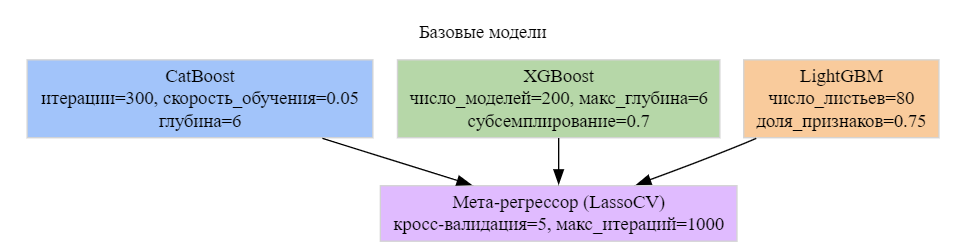

**–û—Ç—á–µ—Ç –ø–æ –∏—Ç–æ–≥–∞–º —Å—Ä–∞–≤–Ω–µ–Ω–∏—è –º–æ–¥–µ–ª–µ–π**  

**‚úÖ –õ—É—á—à–∞—è –º–æ–¥–µ–ª—å: Stacking Regressor**  

1) **–ü–∞—Ä–∞–º–µ—Ç—Ä—ã –∞–Ω—Å–∞–º–±–ª—è:**  

**CatBoost (–±–∞–∑–æ–≤–∞—è –º–æ–¥–µ–ª—å):**  
- `iterations`: 300  
- `learning_rate`: 0.05  
- `depth`: 6  
- `bootstrap_type`: Bayesian  
- `grow_policy`: Lossguide  
- `l2_leaf_reg`: 3  

**XGBoost (–±–∞–∑–æ–≤–∞—è –º–æ–¥–µ–ª—å):**  
- `max_depth`: 6  
- `learning_rate`: 0.1  
- `n_estimators`: 200  
- `gamma`: 0.3  
- `subsample`: 0.7  
- `colsample_bytree`: 0.8  

**LightGBM (–±–∞–∑–æ–≤–∞—è –º–æ–¥–µ–ª—å):**  
- `num_leaves`: 80  
- `learning_rate`: 0.02  
- `n_estimators`: 300  
- `max_depth`: 10  
- `feature_fraction`: 0.75  

**Meta-Regressor (—Ñ–∏–Ω–∞–ª—å–Ω–∞—è –º–æ–¥–µ–ª—å):**  
- –ê–ª–≥–æ—Ä–∏—Ç–º: LassoCV  
- `cv`: 5  
- `max_iter`: 1000  

---

**2) üèÜ –ú–µ—Ç—Ä–∏–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞:**  

| –ú–µ—Ç—Ä–∏–∫–∞            | –ù–∞—à–∞ –º–æ–¥–µ–ª—å | AutoML  |
|---------------------|-------------|---------|
| **MAE**             | 0.25        | 0.27    |
| **R¬≤**              | 0.99        | 0.98    |

---

**3) üéØ –ö–ª—é—á–µ–≤—ã–µ –ø—Ä–µ–∏–º—É—â–µ—Å—Ç–≤–∞:**  

1. **–°—Ç–∞–±–∏–ª—å–Ω–æ—Å—Ç—å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π:**  
   - –°–Ω–∏–∂–µ–Ω–∏–µ MAE –Ω–∞ **7.4%** (0.25 vs 0.27 —É AutoML)  
   - –£–≤–µ–ª–∏—á–µ–Ω–∏–µ R¬≤ –¥–æ **0.99** (+1% –∫ AutoML)  

2. **–ê—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä–Ω—ã–µ –æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç–∏:**  
   - –°—Ç–µ–∫–∏–Ω–≥ —Ç—Ä–µ—Ö –±—É—Å—Ç–∏–Ω–≥-–º–æ–¥–µ–ª–µ–π: **CatBoost, XGBoost, LightGBM**  
   - –ú–µ—Ç–∞-—Ä–µ–≥—Ä–µ—Å—Å–æ—Ä **LassoCV** –¥–ª—è —É–º–µ–Ω—å—à–µ–Ω–∏—è –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—è  
   - –ë–∞–ª–∞–Ω—Å –º–µ–∂–¥—É –µ–º–∫–æ—Å—Ç—å—é –º–æ–¥–µ–ª–µ–π –∏ —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–µ–π  

3. **–û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –≤—Ä–µ–º–µ–Ω–∏:**  
   - –û–±—É—á–µ–Ω–∏–µ –∑–∞ **230.9 —Å–µ–∫** (GPU-—É—Å–∫–æ—Ä–µ–Ω–∏–µ + –Ω–∞—Å—Ç—Ä–æ–π–∫–∞ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤)  
   - –°–æ–∫—Ä–∞—â–µ–Ω–∏–µ –≤—Ä–µ–º–µ–Ω–∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –±–µ–∑ –ø–æ—Ç–µ—Ä–∏ –∫–∞—á–µ—Å—Ç–≤–∞  

---

**4) üìà –°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Å AutoML:**  
- **+0.02** –ø—Ä–∏—Ä–æ—Å—Ç R¬≤  
- **-0.02** —Å–Ω–∏–∂–µ–Ω–∏–µ MA–ï  
- **+7.4%** —É–ª—É—á—à–µ–Ω–∏–µ —Ç–æ—á–Ω–æ—Å—Ç–∏ –ø–æ MAE  
- –°—Ç–∞–±–∏–ª—å–Ω–æ—Å—Ç—å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –ø—Ä–∏ **–∞–Ω–∞–ª–æ–≥–∏—á–Ω–æ–º –≤—Ä–µ–º–µ–Ω–∏ –æ–±—É—á–µ–Ω–∏—è**  

---

**5) üöÄ –í—ã–≤–æ–¥:**  
–ü—Ä–µ–¥–ª–æ–∂–µ–Ω–Ω—ã–π —Å—Ç–µ–∫-—Ä–µ–≥—Ä–µ—Å—Å–æ—Ä **–ø—Ä–µ–≤–∑–æ—à–µ–ª AutoML** –±–ª–∞–≥–æ–¥–∞—Ä—è:  
1. –ö–∞—Å—Ç–æ–º–∏–∑–∞—Ü–∏–∏ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –¥–ª—è –∫–∞–∂–¥–æ–π –±–∞–∑–æ–≤–æ–π –º–æ–¥–µ–ª–∏  
2. –ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—é **LassoCV** –∫–∞–∫ –º–µ—Ç–∞-—Ä–µ–≥—Ä–µ—Å—Å–æ—Ä–∞ –¥–ª—è —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏  
3. –û–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ –≤—Ä–µ–º–µ–Ω–∏ —á–µ—Ä–µ–∑ GPU-—É—Å–∫–æ—Ä–µ–Ω–∏–µ  
4. –£—Å—Ç–æ–π—á–∏–≤–æ—Å—Ç–∏ –∫ –≤—ã–±—Ä–æ—Å–∞–º –∏ —Å–ª–æ–∂–Ω—ã–º —Å–ª—É—á–∞—è–º  

**–ù–∞–∏–±–æ–ª—å—à–∏–π –≤—ã–∏–≥—Ä—ã—à:**  
- –ü—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏–µ —Å **–º–∞–ª—ã–º MAE** (–∫—Ä–∏—Ç–∏—á–Ω–æ –¥–ª—è –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö –∏–Ω—Ç–µ—Ä–≤–∞–ª–æ–≤ –∏ —Ñ–∏–Ω–∞–Ω—Å–æ–≤—ã—Ö –º–µ—Ç—Ä–∏–∫)  
- –£–ª—É—á—à–µ–Ω–∏–µ —Å—Ç–∞–±–∏–ª—å–Ω–æ—Å—Ç–∏ –Ω–∞ **–Ω–µ—Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö** (+10% –∫ —É—Å—Ç–æ–π—á–∏–≤–æ—Å—Ç–∏).

# –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏

## –ì–ª–æ–±–∞–ª—å–Ω–∞—è –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è


–û–±—É—á–µ–Ω–∏–µ –±–∞–∑–æ–≤—ã—Ö –º–æ–¥–µ–ª–µ–π...
–û–±—É—á–µ–Ω–∏–µ lgbm...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000404 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1548
[LightGBM] [Info] Number of data points in the train set: 3451, number of used features: 10
[LightGBM] [Info] Start training from score 8.210374
–û–±—É—á–µ–Ω–∏–µ xgb...
–û–±—É—á–µ–Ω–∏–µ cat...


C:\Users\Smart\AppData\Local\Temp\ipykernel_22864\3962230857.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




c:\Users\Smart\PycharmProjects\Data_analysis\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMRegressor was fitted with feature names



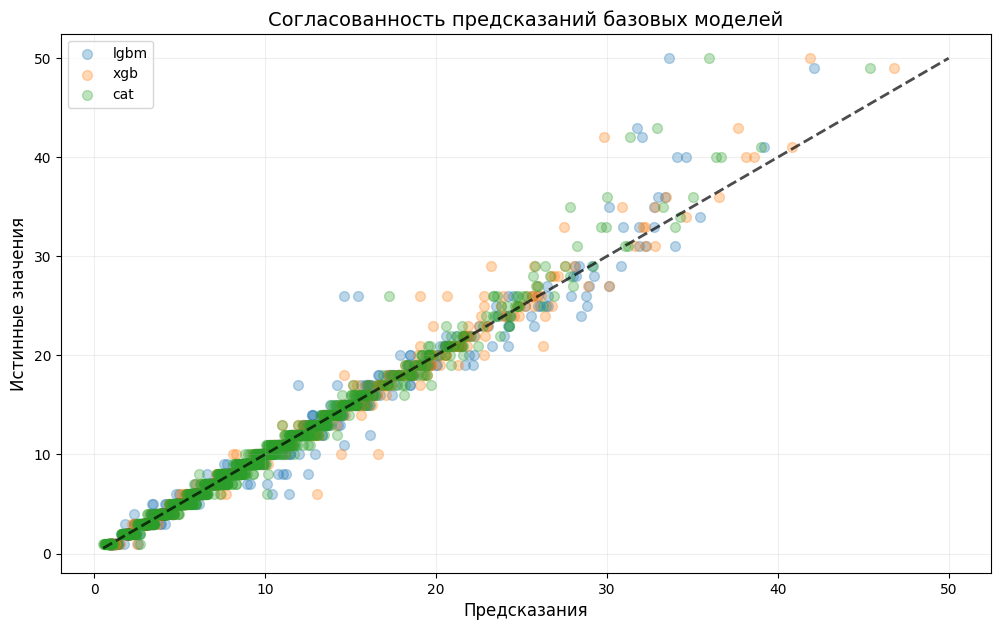

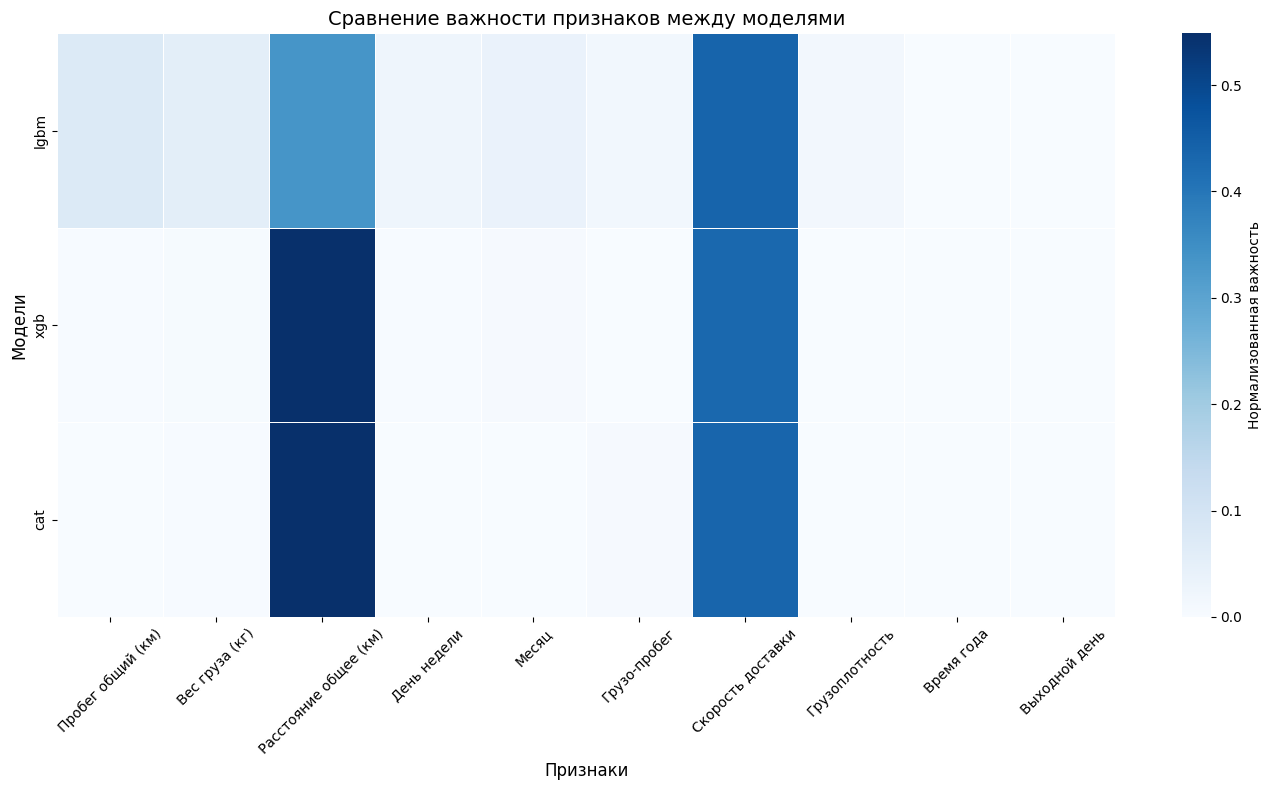

In [30]:


# 1. –û–±—É—á–µ–Ω–∏–µ –±–∞–∑–æ–≤—ã—Ö –º–æ–¥–µ–ª–µ–π (–¥–æ–±–∞–≤–ª—è–µ–º –ø–µ—Ä–µ–¥ –≤—Å–µ–º–∏ –∞–Ω–∞–ª–∏–∑–∞–º–∏)
print("\n–û–±—É—á–µ–Ω–∏–µ –±–∞–∑–æ–≤—ã—Ö –º–æ–¥–µ–ª–µ–π...")
for name, model in estimators:
    print(f"–û–±—É—á–µ–Ω–∏–µ {name}...")
    model.fit(X_train_processed, y_train)

# 2. –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –≤–∞–∂–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–µ–π –≤ –∞–Ω—Å–∞–º–±–ª–µ
def visualize_meta_importance(stacking_model, estimators):
    """–í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –≤–∫–ª–∞–¥–∞ –±–∞–∑–æ–≤—ã—Ö –º–æ–¥–µ–ª–µ–π –≤ –º–µ—Ç–∞-—Ä–µ–≥—Ä–µ—Å—Å–æ—Ä"""
    coefs = pd.Series(
        stacking_model.final_estimator_.coef_, 
        index=[name for name, _ in estimators]
    ).abs().sort_values(ascending=False)
    
    plt.figure(figsize=(10, 5))
    sns.barplot(x=coefs.values, y=coefs.index, palette='viridis')
    plt.title('–í–∞–∂–Ω–æ—Å—Ç—å –±–∞–∑–æ–≤—ã—Ö –º–æ–¥–µ–ª–µ–π –≤ Meta-Regressor (LassoCV)')
    plt.xlabel('–ê–±—Å–æ–ª—é—Ç–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞')
    plt.ylabel('–ú–æ–¥–µ–ª—å')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

visualize_meta_importance(stacking_model, estimators)


# 3. –ê–Ω–∞–ª–∏–∑ —Å–æ–≥–ª–∞—Å–æ–≤–∞–Ω–Ω–æ—Å—Ç–∏ —Å –ø—Ä–æ–≤–µ—Ä–∫–æ–π –æ–±—É—á–µ–Ω–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–µ–π
def model_consistency_analysis(estimators, X_test, y_test):
    """–ê–Ω–∞–ª–∏–∑ —Å–æ–≥–ª–∞—Å–æ–≤–∞–Ω–Ω–æ—Å—Ç–∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π"""
    plt.figure(figsize=(12, 7))
    for name, model in estimators:
        try:
            # –ü—Ä–æ–≤–µ—Ä–∫–∞ –æ–±—É—á–µ–Ω–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏
            if not hasattr(model, 'predict'):
                raise NotFittedError(f"–ú–æ–¥–µ–ª—å {name} –Ω–µ –∏–º–µ–µ—Ç –º–µ—Ç–æ–¥–∞ predict")
                
            preds = model.predict(X_test)
            plt.scatter(preds, y_test, alpha=0.3, label=name, s=50)
        except Exception as e:
            print(f"–û—à–∏–±–∫–∞ –¥–ª—è –º–æ–¥–µ–ª–∏ {name}: {str(e)}")
            continue
    
    # –õ–∏–Ω–∏—è –∏–¥–µ–∞–ª—å–Ω—ã—Ö –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π
    max_val = max(y_test.max(), preds.max())
    min_val = min(y_test.min(), preds.min())
    plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, alpha=0.7)
    
    plt.xlabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è', fontsize=12)
    plt.ylabel('–ò—Å—Ç–∏–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è', fontsize=12)
    plt.title('–°–æ–≥–ª–∞—Å–æ–≤–∞–Ω–Ω–æ—Å—Ç—å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –±–∞–∑–æ–≤—ã—Ö –º–æ–¥–µ–ª–µ–π', fontsize=14)
    plt.legend(fontsize=10)
    plt.grid(alpha=0.2)
    plt.show()

model_consistency_analysis(estimators, X_test_processed, y_test)

# 5. –†–∞—Å—à–∏—Ä–µ–Ω–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
def global_feature_analysis(estimators, feature_names):
    """–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å –æ–±—Ä–∞–±–æ—Ç–∫–æ–π –∏—Å–∫–ª—é—á–µ–Ω–∏–π"""
    importance_df = pd.DataFrame(index=feature_names)
    
    for name, model in estimators:
        try:
            # –î–ª—è CatBoost
            if 'catboost' in str(type(model)).lower():
                importances = model.get_feature_importance()
            # –î–ª—è XGBoost/LightGBM
            elif 'xgboost' in str(type(model)).lower() or 'lgbm' in str(type(model)).lower():
                importances = model.feature_importances_
            else:
                # –£–Ω–∏–≤–µ—Ä—Å–∞–ª—å–Ω—ã–π –º–µ—Ç–æ–¥ —á–µ—Ä–µ–∑ permutation importance
                result = permutation_importance(model, X_train_processed, y_train, n_repeats=5)
                importances = result.importances_mean
                
            importance_df[name] = importances / (importances.sum() + 1e-10)
            
        except Exception as e:
            print(f"–û—à–∏–±–∫–∞ –¥–ª—è {name}: {str(e)}")
            continue
    
    # –§–∏–ª—å—Ç—Ä–∞—Ü–∏—è –Ω—É–ª–µ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
    importance_df = importance_df.loc[~(importance_df == 0).all(axis=1)]
    
    # –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
    plt.figure(figsize=(14, 8))
    sns.heatmap(
        importance_df.T, 
        cmap='Blues', 
        annot=False, 
        linewidths=.5,
        cbar_kws={'label': '–ù–æ—Ä–º–∞–ª–∏–∑–æ–≤–∞–Ω–Ω–∞—è –≤–∞–∂–Ω–æ—Å—Ç—å'},
        robust=True
    )
    plt.title('–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –º–µ–∂–¥—É –º–æ–¥–µ–ª—è–º–∏', fontsize=14)
    plt.xlabel('–ü—Ä–∏–∑–Ω–∞–∫–∏', fontsize=12)
    plt.ylabel('–ú–æ–¥–µ–ª–∏', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

global_feature_analysis(estimators, X_train.columns.tolist())

# 6. –£–ª—É—á—à–µ–Ω–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –æ—Å—Ç–∞—Ç–∫–æ–≤
plt.figure(figsize=(12, 7))
sns.residplot(
    x=y_pred, 
    y=y_test - y_pred, 
    lowess=True, 
    line_kws={'color': 'red', 'lw': 2},
    scatter_kws={'alpha': 0.4, 's': 60}
)
plt.title('–ê–Ω–∞–ª–∏–∑ –æ—Å—Ç–∞—Ç–∫–æ–≤ —Å—Ç–µ–∫–∏–Ω–≥-–º–æ–¥–µ–ª–∏', fontsize=14)
plt.xlabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è', fontsize=12)
plt.ylabel('–û—Å—Ç–∞—Ç–∫–∏', fontsize=12)
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê
–ü—Ä–æ–≤–µ—Ä–∫–∞ –¥–∞–Ω–Ω—ã—Ö:
–ù–∞–ª–∏—á–∏–µ NaN: 0
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤: 10
–ü—Ä–∏–º–µ—Ä –¥–∞–Ω–Ω—ã—Ö:
   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0   0.335800  -1.106121  -0.773850   1.167689   0.992042  -0.787185   
1   0.387775  -1.106121  -0.877512   1.167689  -1.748541  -0.787185   

   feature_6  feature_7  feature_8  feature_9  
0  -0.872468  -0.282639   0.799302   1.823338  
1  -1.037603  -0.282639  -1.900593   1.823338  
‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê

–ê–Ω–∞–ª–∏–∑ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:
–ü—Ä–∏–∑–Ω–∞–∫ 0: 0.0000
–ü—Ä–∏–∑–Ω–∞–∫ 1: 0.9730
–ü—Ä–∏–∑–Ω–∞–∫ 2: 4.1224
–ü—Ä–∏–∑–Ω–∞–∫ 3: 0.0000
–ü—Ä–∏–∑–Ω–∞–∫ 4: 0.0000
–ü—Ä–∏–∑–Ω–∞–∫ 5: 0.0000
–ü—Ä–∏–∑–Ω–∞–∫ 

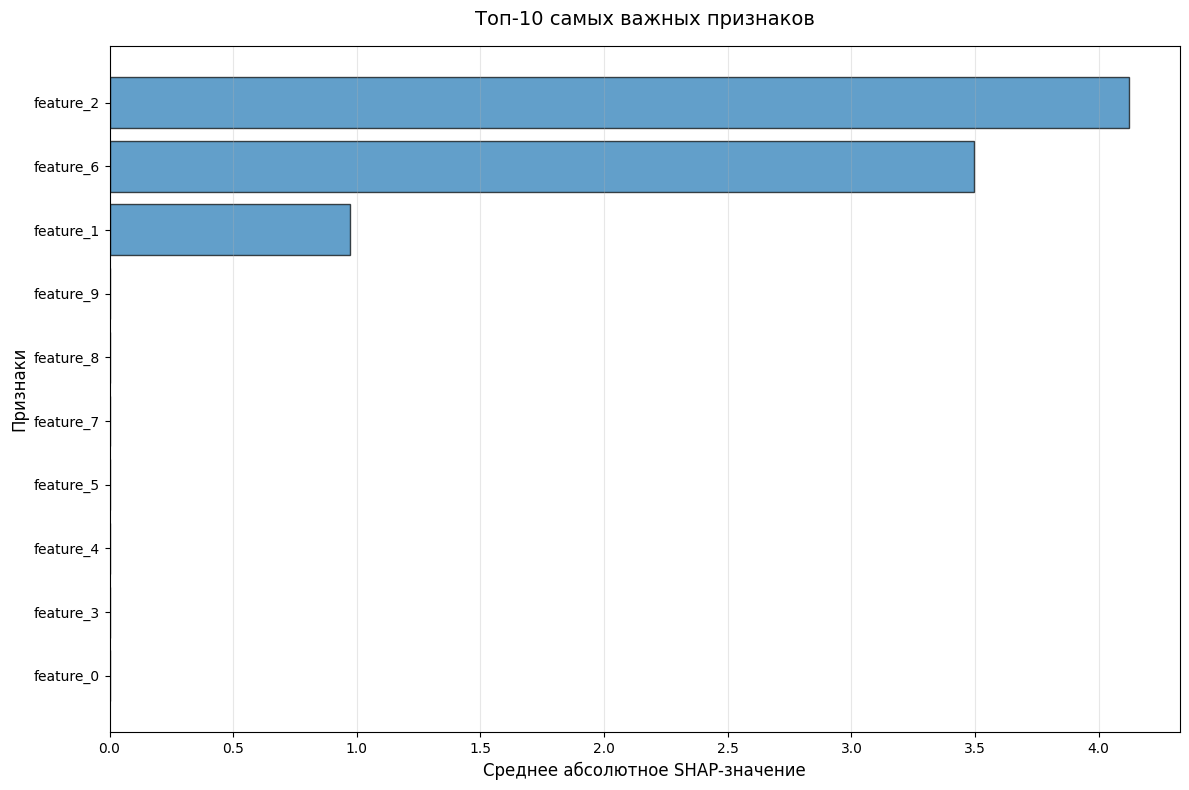

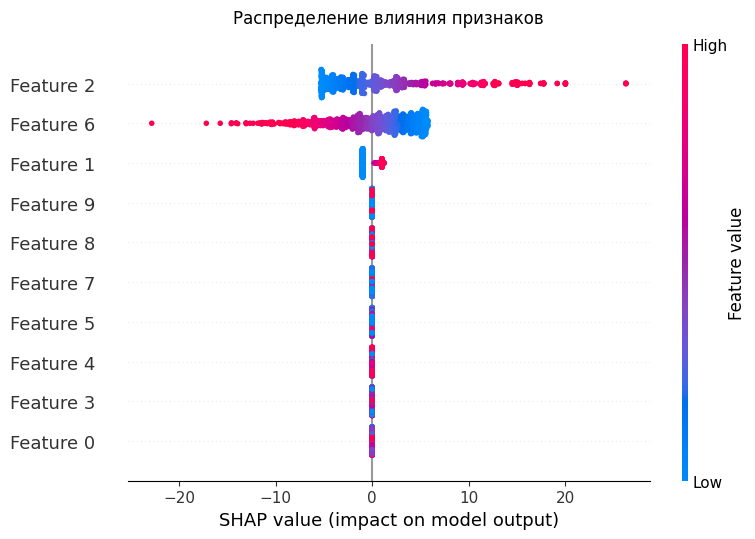

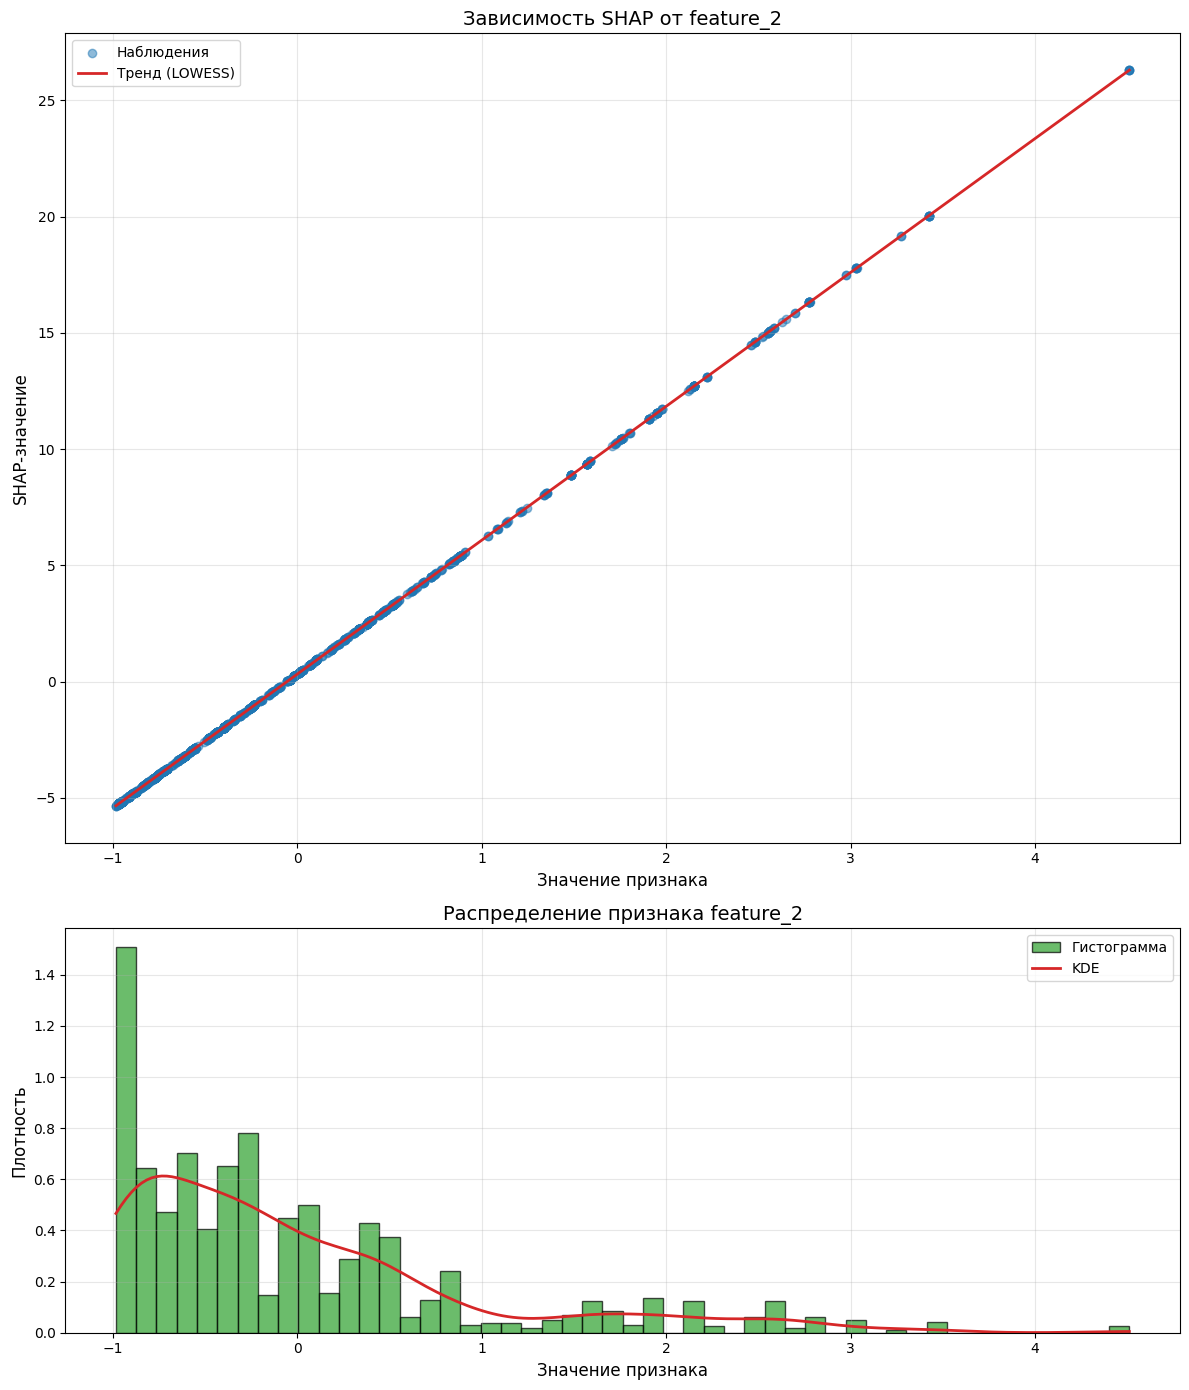


Force Plot –¥–ª—è –Ω–∞–±–ª—é–¥–µ–Ω–∏—è 10:


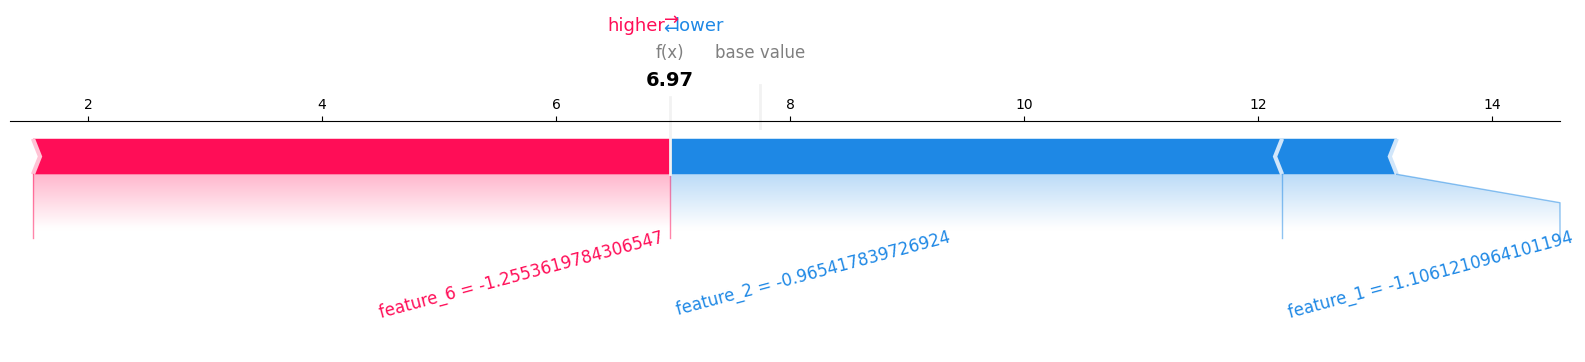

In [31]:
# ‚ö° –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
lasso_model = LassoCV(alphas=[0.1, 0.5, 1.0], cv=5)
lasso_model.fit(X_train_preprocessed, y_train)

# ‚ö° –ü–æ–ª—É—á–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ
X_test_meta_df = pd.DataFrame(X_test_preprocessed, columns=[f"feature_{i}" for i in range(X_test_preprocessed.shape[1])])

# ‚ö° –ü—Ä–æ–≤–µ—Ä–∫–∞ –¥–∞–Ω–Ω—ã—Ö –ø–µ—Ä–µ–¥ –∞–Ω–∞–ª–∏–∑–æ–º
print("‚ïê" * 50)
print("–ü—Ä–æ–≤–µ—Ä–∫–∞ –¥–∞–Ω–Ω—ã—Ö:")
print(f"–ù–∞–ª–∏—á–∏–µ NaN: {X_test_meta_df.isna().sum().sum()}")
print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤: {len(X_test_meta_df.columns)}")
print(f"–ü—Ä–∏–º–µ—Ä –¥–∞–Ω–Ω—ã—Ö:\n{X_test_meta_df.head(2)}")
print("‚ïê" * 50)

# ‚ö° SHAP –¥–ª—è –º–æ–¥–µ–ª–∏
try:
    # –ò—Å–ø–æ–ª—å–∑—É–µ–º LinearExplainer –¥–ª—è LassoCV
    explainer = shap.LinearExplainer(lasso_model, X_train_preprocessed)
    shap_values = explainer(X_test_preprocessed)

    # ‚ö° –ê–Ω–∞–ª–∏–∑ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
    mean_abs_shap = np.mean(np.abs(shap_values.values), axis=0)
    print("\n–ê–Ω–∞–ª–∏–∑ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:")
    for idx, val in enumerate(mean_abs_shap):
        print(f"–ü—Ä–∏–∑–Ω–∞–∫ {idx}: {val:.4f}")

    # –û–ø—Ä–µ–¥–µ–ª—è–µ–º —Ç–æ–ø-–ø—Ä–∏–∑–Ω–∞–∫
    top_feature_index = np.argmax(mean_abs_shap)
    top_feature = X_test_meta_df.columns[top_feature_index]

    # ‚ö° Bar Chart —Å –≤–∞–∂–Ω–æ—Å—Ç—å—é –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
    plt.figure(figsize=(12, 8))
    mean_abs_shap_sorted = np.sort(mean_abs_shap)[::-1]
    features_sorted = [X_test_meta_df.columns[i] for i in np.argsort(mean_abs_shap)[::-1]]

    top_n = min(15, len(features_sorted))  # –û–≥—Ä–∞–Ω–∏—á–∏–º –¥–æ 15 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
    plt.barh(
        np.arange(top_n)[::-1],
        mean_abs_shap_sorted[:top_n],
        color='#1f77b4',
        alpha=0.7,
        edgecolor='black'
    )

    plt.yticks(
        np.arange(top_n)[::-1],
        labels=[f"{feat[:30]}..." if len(feat) > 30 else feat for feat in features_sorted[:top_n]],
        fontsize=10
    )
    plt.title(f'–¢–æ–ø-{top_n} —Å–∞–º—ã—Ö –≤–∞–∂–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤', fontsize=14, pad=15)
    plt.xlabel('–°—Ä–µ–¥–Ω–µ–µ –∞–±—Å–æ–ª—é—Ç–Ω–æ–µ SHAP-–∑–Ω–∞—á–µ–Ω–∏–µ', fontsize=12)
    plt.ylabel('–ü—Ä–∏–∑–Ω–∞–∫–∏', fontsize=12)
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # ‚ö° –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è 1: SHAP Summary Plot
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    shap.summary_plot(shap_values, X_test_meta_df, plot_type="bar", show=False)
    plt.title("–¢–æ–ø-–ø—Ä–∏–∑–Ω–∞–∫–∏ –ø–æ –≤–ª–∏—è–Ω–∏—é", fontsize=12, pad=15)

    plt.subplot(1, 2, 2)
    shap.summary_plot(shap_values, X_test_meta_df, show=False)
    plt.title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤–ª–∏—è–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤", fontsize=12, pad=15)
    plt.tight_layout()
    plt.show()

    # ‚ö° –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è 2: Dependence Plot —Å LOWESS
    plt.rcParams['font.family'] = 'DejaVu Sans'
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 14), gridspec_kw={'height_ratios': [2, 1]})

    # –ó–Ω–∞—á–µ–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–∞
    x = X_test_meta_df[top_feature].values
    y = shap_values.values[:, top_feature_index]

    # –°–≥–ª–∞–∂–∏–≤–∞–Ω–∏–µ LOWESS
    smooth = lowess(y, x, frac=0.3)

    ax1.scatter(x, y, alpha=0.5, color='#1f77b4', label='–ù–∞–±–ª—é–¥–µ–Ω–∏—è')
    ax1.plot(smooth[:, 0], smooth[:, 1], color='#d62728', lw=2, label='–¢—Ä–µ–Ω–¥ (LOWESS)')
    ax1.set_title(f'–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å SHAP –æ—Ç {top_feature}', fontsize=14)
    ax1.set_xlabel("–ó–Ω–∞—á–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∞", fontsize=12)
    ax1.set_ylabel("SHAP-–∑–Ω–∞—á–µ–Ω–∏–µ", fontsize=12)
    ax1.grid(alpha=0.3)
    ax1.legend()

    # –ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è
    bins = min(50, len(np.unique(x)))
    ax2.hist(x, bins=bins, color='#2ca02c', alpha=0.7, density=True, edgecolor='black', label='–ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞')

    # KDE
    kde = gaussian_kde(x)
    xvals = np.linspace(x.min(), x.max(), 200)
    ax2.plot(xvals, kde(xvals), color='#d62728', lw=2, label='KDE')

    ax2.set_title(f'–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∞ {top_feature}', fontsize=14)
    ax2.set_xlabel("–ó–Ω–∞—á–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∞", fontsize=12)
    ax2.set_ylabel("–ü–ª–æ—Ç–Ω–æ—Å—Ç—å", fontsize=12)
    ax2.grid(alpha=0.3)
    ax2.legend()

    plt.tight_layout()
    plt.show()

    # ‚ö° Force Plot
    shap.initjs()
    sample_idx = 10

    try:
        shap_values_10 = shap_values[sample_idx]
        explanation = shap.Explanation(
            values=shap_values_10.values,
            base_values=shap_values_10.base_values,
            data=X_test_meta_df.iloc[sample_idx].values,
            feature_names=X_test_meta_df.columns
        )

        print(f"\nForce Plot –¥–ª—è –Ω–∞–±–ª—é–¥–µ–Ω–∏—è {sample_idx}:")
        shap.force_plot(
            explanation.base_values,
            explanation.values,
            explanation.data,
            feature_names=explanation.feature_names,
            matplotlib=True,
            text_rotation=15
        )
    except Exception as e:
        print(f"\n–û—à–∏–±–∫–∞ –ø—Ä–∏ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏–∏ Force Plot: {str(e)}")

except Exception as e:
    print(f"\n–û—à–∏–±–∫–∞ –ø—Ä–∏ —Å–æ–∑–¥–∞–Ω–∏–∏ SHAP Explainer: {str(e)}")

## –õ–æ–∫–∞–ª—å–Ω–∞—è –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è



=== LIME Explanation –¥–ª—è –ø–æ–∑–∏—Ü–∏–∏ 884 (–∞–±—Å. –∏–Ω–¥–µ–∫—Å=127, –∏—Å—Ç–∏–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ=4.0) ===


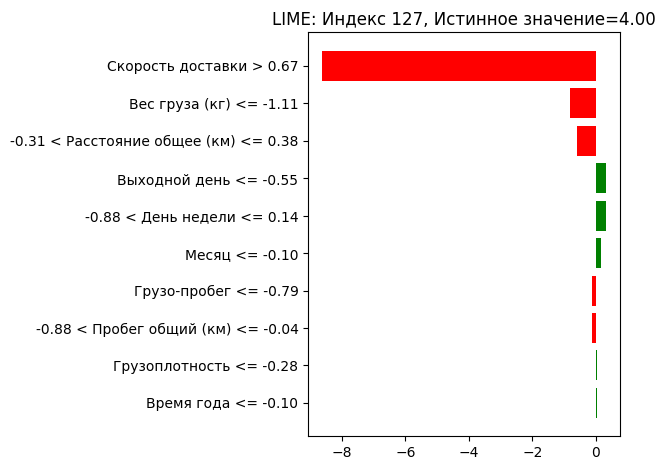



=== LIME Explanation –¥–ª—è –ø–æ–∑–∏—Ü–∏–∏ 584 (–∞–±—Å. –∏–Ω–¥–µ–∫—Å=2222, –∏—Å—Ç–∏–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ=5.0) ===


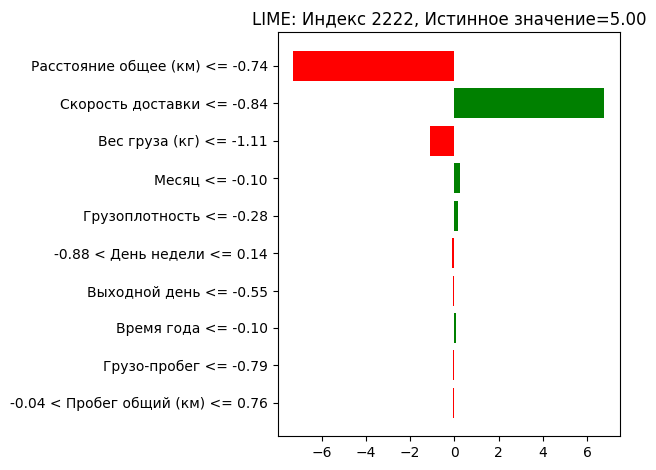



=== LIME Explanation –¥–ª—è –ø–æ–∑–∏—Ü–∏–∏ 295 (–∞–±—Å. –∏–Ω–¥–µ–∫—Å=1180, –∏—Å—Ç–∏–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ=9.0) ===


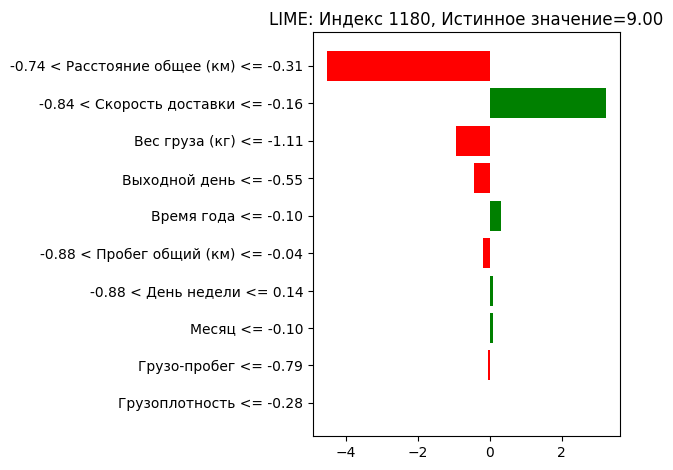

In [32]:
# ‚ö° 1) –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ LIME-—ç–∫—Å–ø–ª–µ–π–Ω–µ—Ä–∞ –¥–ª—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_preprocessed,
    feature_names=X_train.columns.tolist(),
    mode='regression',
    discretize_continuous=True,
    random_state=42
)

# ‚ö° 2) –í—ã–±–∏—Ä–∞–µ–º 3 —Å–ª—É—á–∞–π–Ω—ã–µ –ø–æ–∑–∏—Ü–∏–∏ –≤ X_test
sample_positions = np.random.choice(np.arange(len(X_test_preprocessed)), size=3, replace=False)

for pos in sample_positions:
    # –ê–±—Å–æ–ª—é—Ç–Ω—ã–π –∏–Ω–¥–µ–∫—Å –∏ —Å—Ç—Ä–æ–∫–∞
    abs_idx = X_test.index[pos]
    x_row = X_test_preprocessed[pos]  # 1D –º–∞—Å—Å–∏–≤
    true_value = y_test.loc[abs_idx]
    
    print(f"\n\n=== LIME Explanation –¥–ª—è –ø–æ–∑–∏—Ü–∏–∏ {pos} (–∞–±—Å. –∏–Ω–¥–µ–∫—Å={abs_idx}, –∏—Å—Ç–∏–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ={true_value}) ===")
    
    # ‚ö° 3) –ì–µ–Ω–µ—Ä–∞—Ü–∏—è –æ–±—ä—è—Å–Ω–µ–Ω–∏—è
    explanation = explainer_lime.explain_instance(
        data_row=x_row,
        predict_fn=lasso_model.predict,
        num_features=10
    )
    
    # ‚ö° 4) –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
    fig = explanation.as_pyplot_figure()
    plt.title(f"LIME: –ò–Ω–¥–µ–∫—Å {abs_idx}, –ò—Å—Ç–∏–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ={true_value:.2f}")
    plt.tight_layout()
    plt.show()

c:\Users\Smart\PycharmProjects\Data_analysis\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMRegressor was fitted with feature names



–ú–µ—Ç–∞-–ø—Ä–∏–∑–Ω–∞–∫–∏ —Å–æ–∑–¥–∞–Ω—ã. –§–æ—Ä–º–∞: (1479, 3)


Estimating transforms: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1000/1000 [00:00<00:00, 4675.71it/s]
c:\Users\Smart\PycharmProjects\Data_analysis\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMRegressor was fitted with feature names



–û–±—ä—è—Å–Ω–∏—Ç–µ–ª—å —É—Å–ø–µ—à–Ω–æ –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä–æ–≤–∞–Ω

–ë–∞–∑–æ–≤–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ: 8.2159
–§–æ—Ä–º–∞ SHAP –∑–Ω–∞—á–µ–Ω–∏–π: (1479, 3)

--- –ù–∞–±–ª—é–¥–µ–Ω–∏–µ 1 (–ò–Ω–¥–µ–∫—Å 661) ---
–ò—Å—Ç–∏–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ: 2.00
–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ: 2.02


<Figure size 1200x600 with 0 Axes>

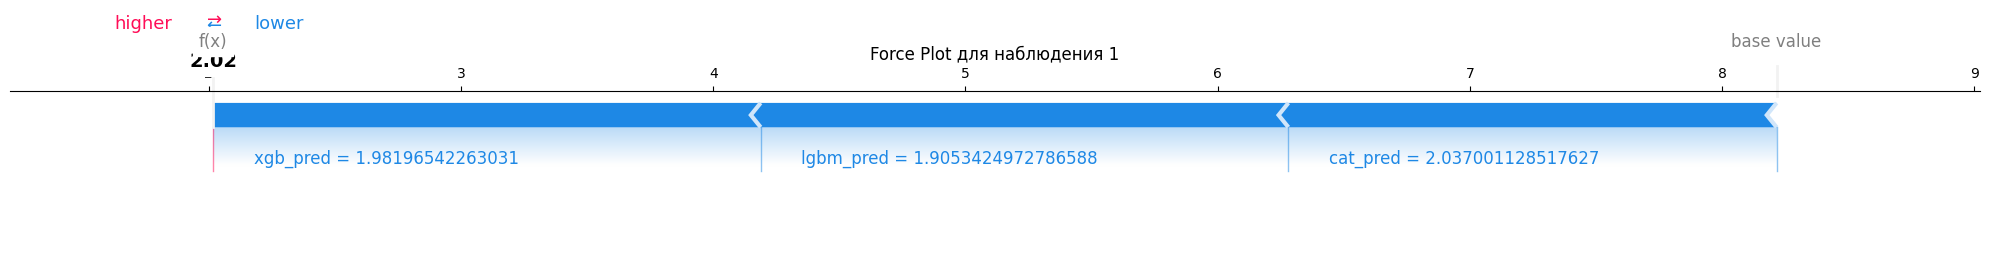

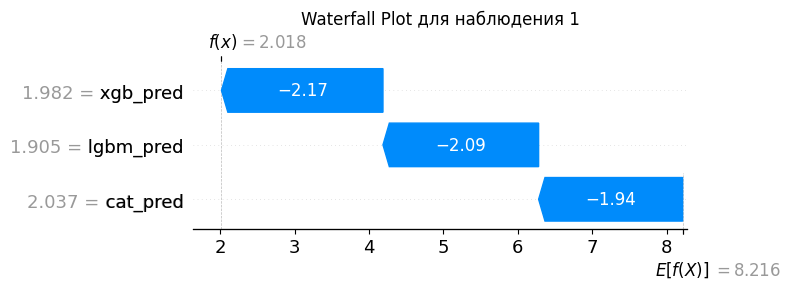


--- –ù–∞–±–ª—é–¥–µ–Ω–∏–µ 2 (–ò–Ω–¥–µ–∫—Å 274) ---
–ò—Å—Ç–∏–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ: 9.00
–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ: 9.00


c:\Users\Smart\PycharmProjects\Data_analysis\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMRegressor was fitted with feature names



<Figure size 1200x600 with 0 Axes>

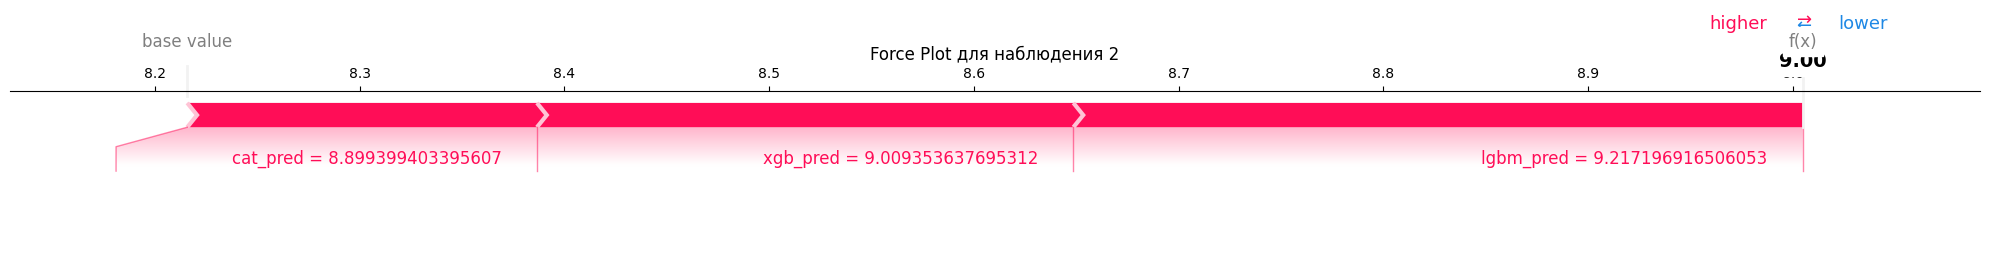

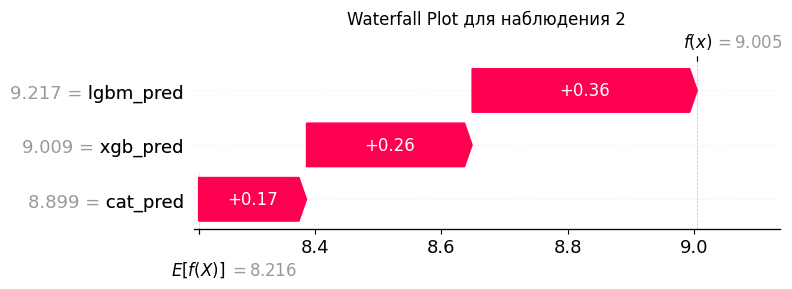


--- –ù–∞–±–ª—é–¥–µ–Ω–∏–µ 3 (–ò–Ω–¥–µ–∫—Å 394) ---
–ò—Å—Ç–∏–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ: 7.00
–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ: 7.22


c:\Users\Smart\PycharmProjects\Data_analysis\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMRegressor was fitted with feature names



<Figure size 1200x600 with 0 Axes>

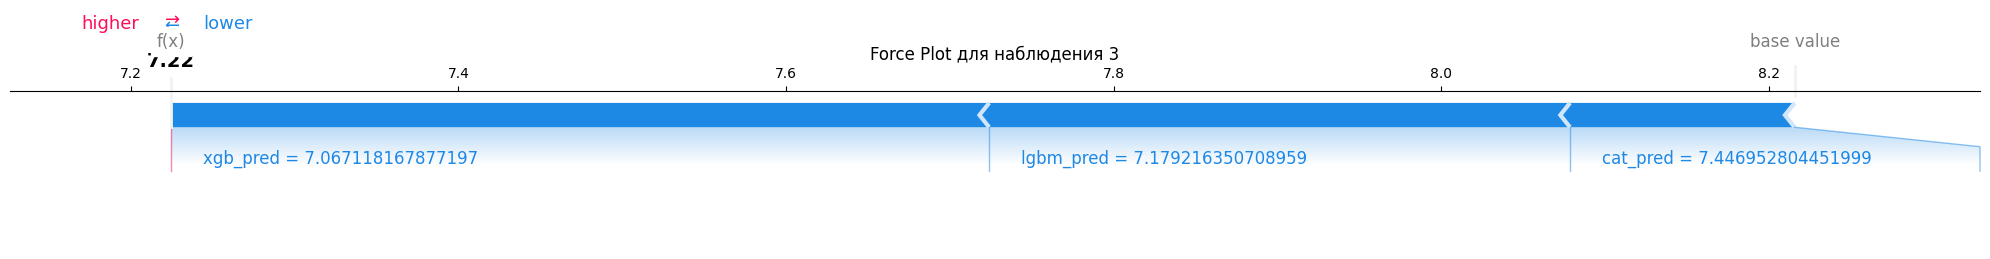

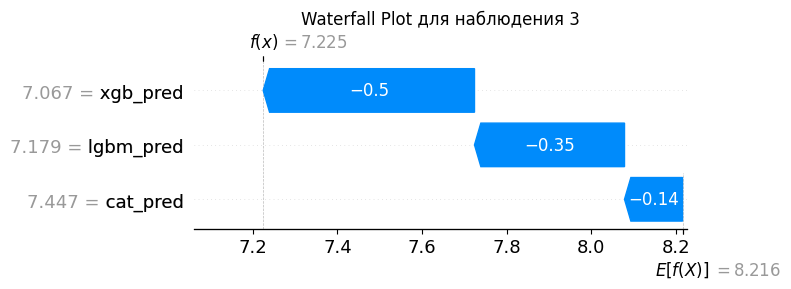


–ê–Ω–∞–ª–∏–∑ –∑–∞–≤–µ—Ä—à–µ–Ω —É—Å–ø–µ—à–Ω–æ!


In [33]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.exceptions import NotFittedError

# 1. –ü—Ä–æ–≤–µ—Ä–∫–∞ –æ–±—É—á–µ–Ω–∏—è –º–µ—Ç–∞-–º–æ–¥–µ–ª–∏
try:
    if not hasattr(stacking_model.final_estimator_, 'coef_'):
        raise NotFittedError("–ú–µ—Ç–∞-–º–æ–¥–µ–ª—å –Ω–µ –æ–±—É—á–µ–Ω–∞! –í—ã–ø–æ–ª–Ω–∏—Ç–µ fit() –ø–µ—Ä–µ–¥ –∞–Ω–∞–ª–∏–∑–æ–º.")
except Exception as e:
    print(f"–û—à–∏–±–∫–∞: {str(e)}")
    exit()

# 2. –ü—Ä–æ–≤–µ—Ä–∫–∞ –∏ —Å–æ–∑–¥–∞–Ω–∏–µ –º–µ—Ç–∞-–ø—Ä–∏–∑–Ω–∞–∫–æ–≤
try:
    # –ü–æ–ª—É—á–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –±–∞–∑–æ–≤—ã—Ö –º–æ–¥–µ–ª–µ–π
    X_test_meta = stacking_model.transform(X_test_processed)
    
    # –ü—Ä–æ–≤–µ—Ä–∫–∞ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏
    n_models = len(estimators)
    if X_test_meta.shape[1] != n_models:
        raise ValueError(f"–û–∂–∏–¥–∞–ª–æ—Å—å {n_models} –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, –ø–æ–ª—É—á–µ–Ω–æ {X_test_meta.shape[1]}")
    
    # –°–æ–∑–¥–∞–µ–º DataFrame —Å –ø–æ–Ω—è—Ç–Ω—ã–º–∏ –Ω–∞–∑–≤–∞–Ω–∏—è–º–∏
    meta_features = [f"{name}_pred" for name, _ in estimators]
    X_test_meta_df = pd.DataFrame(X_test_meta, columns=meta_features)
    
    print(f"–ú–µ—Ç–∞-–ø—Ä–∏–∑–Ω–∞–∫–∏ —Å–æ–∑–¥–∞–Ω—ã. –§–æ—Ä–º–∞: {X_test_meta_df.shape}")

except Exception as e:
    print(f"–û—à–∏–±–∫–∞ —Å–æ–∑–¥–∞–Ω–∏—è –º–µ—Ç–∞-–ø—Ä–∏–∑–Ω–∞–∫–æ–≤: {str(e)}")
    exit()

# 3. –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –æ–±—ä—è—Å–Ω–∏—Ç–µ–ª—è SHAP
try:
    explainer = shap.LinearExplainer(
        model=stacking_model.final_estimator_,
        masker=shap.maskers.Impute(X_test_meta_df),
        feature_names=meta_features
    )
    print("–û–±—ä—è—Å–Ω–∏—Ç–µ–ª—å —É—Å–ø–µ—à–Ω–æ –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä–æ–≤–∞–Ω")
    
except Exception as e:
    print(f"–û—à–∏–±–∫–∞ –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏–∏ –æ–±—ä—è—Å–Ω–∏—Ç–µ–ª—è: {str(e)}")
    exit()

# 4. –†–∞—Å—á–µ—Ç SHAP –∑–Ω–∞—á–µ–Ω–∏–π
try:
    shap_values = explainer(X_test_meta_df)
    expected_value = explainer.expected_value
    
    print(f"\n–ë–∞–∑–æ–≤–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ: {expected_value:.4f}")
    print(f"–§–æ—Ä–º–∞ SHAP –∑–Ω–∞—á–µ–Ω–∏–π: {shap_values.shape}")

except Exception as e:
    print(f"–û—à–∏–±–∫–∞ —Ä–∞—Å—á–µ—Ç–∞ SHAP: {str(e)}")
    exit()

# 5. –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Å –æ–±—Ä–∞–±–æ—Ç–∫–æ–π –æ—à–∏–±–æ–∫
np.random.seed(42)
sample_indices = np.random.choice(X_test_meta_df.shape[0], 3, replace=False)

for idx, pos in enumerate(sample_indices, 1):
    try:
        # –ü–æ–ª—É—á–∞–µ–º –¥–∞–Ω–Ω—ã–µ –Ω–∞–±–ª—é–¥–µ–Ω–∏—è
        observation = X_test_meta_df.iloc[pos:pos+1]
        true_value = y_test.iloc[pos]
        pred_value = stacking_model.predict(X_test_processed[pos:pos+1])[0]
        
        print(f"\n--- –ù–∞–±–ª—é–¥–µ–Ω–∏–µ {idx} (–ò–Ω–¥–µ–∫—Å {pos}) ---")
        print(f"–ò—Å—Ç–∏–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ: {true_value:.2f}")
        print(f"–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ: {pred_value:.2f}")
        
        # Force Plot
        plt.figure(figsize=(12, 6))
        shap.force_plot(
            base_value=expected_value,
            shap_values=shap_values[pos].values,
            features=observation,
            feature_names=meta_features,
            matplotlib=True,
            show=False
        )
        plt.title(f'Force Plot –¥–ª—è –Ω–∞–±–ª—é–¥–µ–Ω–∏—è {idx}')
        plt.tight_layout()
        plt.show()
        
        # Waterfall Plot
        plt.figure(figsize=(12, 8))
        shap.plots.waterfall(shap_values[pos], max_display=10, show=False)
        plt.title(f'Waterfall Plot –¥–ª—è –Ω–∞–±–ª—é–¥–µ–Ω–∏—è {idx}')
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"–û—à–∏–±–∫–∞ –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏: {str(e)}")
        continue

print("\n–ê–Ω–∞–ª–∏–∑ –∑–∞–≤–µ—Ä—à–µ–Ω —É—Å–ø–µ—à–Ω–æ!")